<a href="https://colab.research.google.com/github/zineb99hmd/CoronaVirus/blob/main/CoronaVirus_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Télecharger dataset

In [14]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
data=pd.read_excel('/content/dataset.xlsx')
df=data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# 1. Exploratory Data Analysis
Objectif :

*   Comprendre du mieux possible nos données(un petit pas en avant vaut mieux qu'un grand pas en arriere)
*  Développer une premiere stratégie de modélisation
# Checklist de base
> **Analyse de Forme :**


*   variable target : SARS-Cov-2 exam result
*   lignes et colonnes : 5644, 111


*   types de variables : qualitatives : 70, quantitatives : 41
*   Analyse des valeurs manquantes :
beaucoup de NaN (moitié des variables > 90% de NaN)
2 groupes de données 76% -> Test viral, 89% -> taux sanguins


> **Analyse de Fond :**


*   Visualisation de la target :
10% de positifs (558 / 5000)
*   Signification des variables :

 -variables continues standardisées, skewed (asymétriques), test sanguin.

 -age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi etre une transformation mathématique. On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ca n'est pas tres important.

 -variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée



* **Relation Variables / Target :**

-target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester

-target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins

-target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19

# **Analyse plus détaillée**
* **Relation Variables / Variables :**

*   blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)

*  blood_data / age : tres faible corrélation entre age et taux sanguins
*  viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
*  relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
* relation hospitalisation / est malade :
*  relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller
* NaN analyse : viral : 1350(92/8), blood : 600(87/13), both : 90
* **hypotheses nulle (H0):**
* Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents

* H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs
* Les individus atteints d'une quelconque maladie ont des taux significativement différents
## Conclusion initiale
* Beaucoup de données manquantes(au mieux on garde 20% du Dataset)
* 2 groupes de données interessantes(viral,sanguin)



# Analyse de la forme des données

In [15]:
df.shape

(5644, 111)

In [16]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [17]:
df.isna()


Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

# Analyse Les NAN

<Axes: >

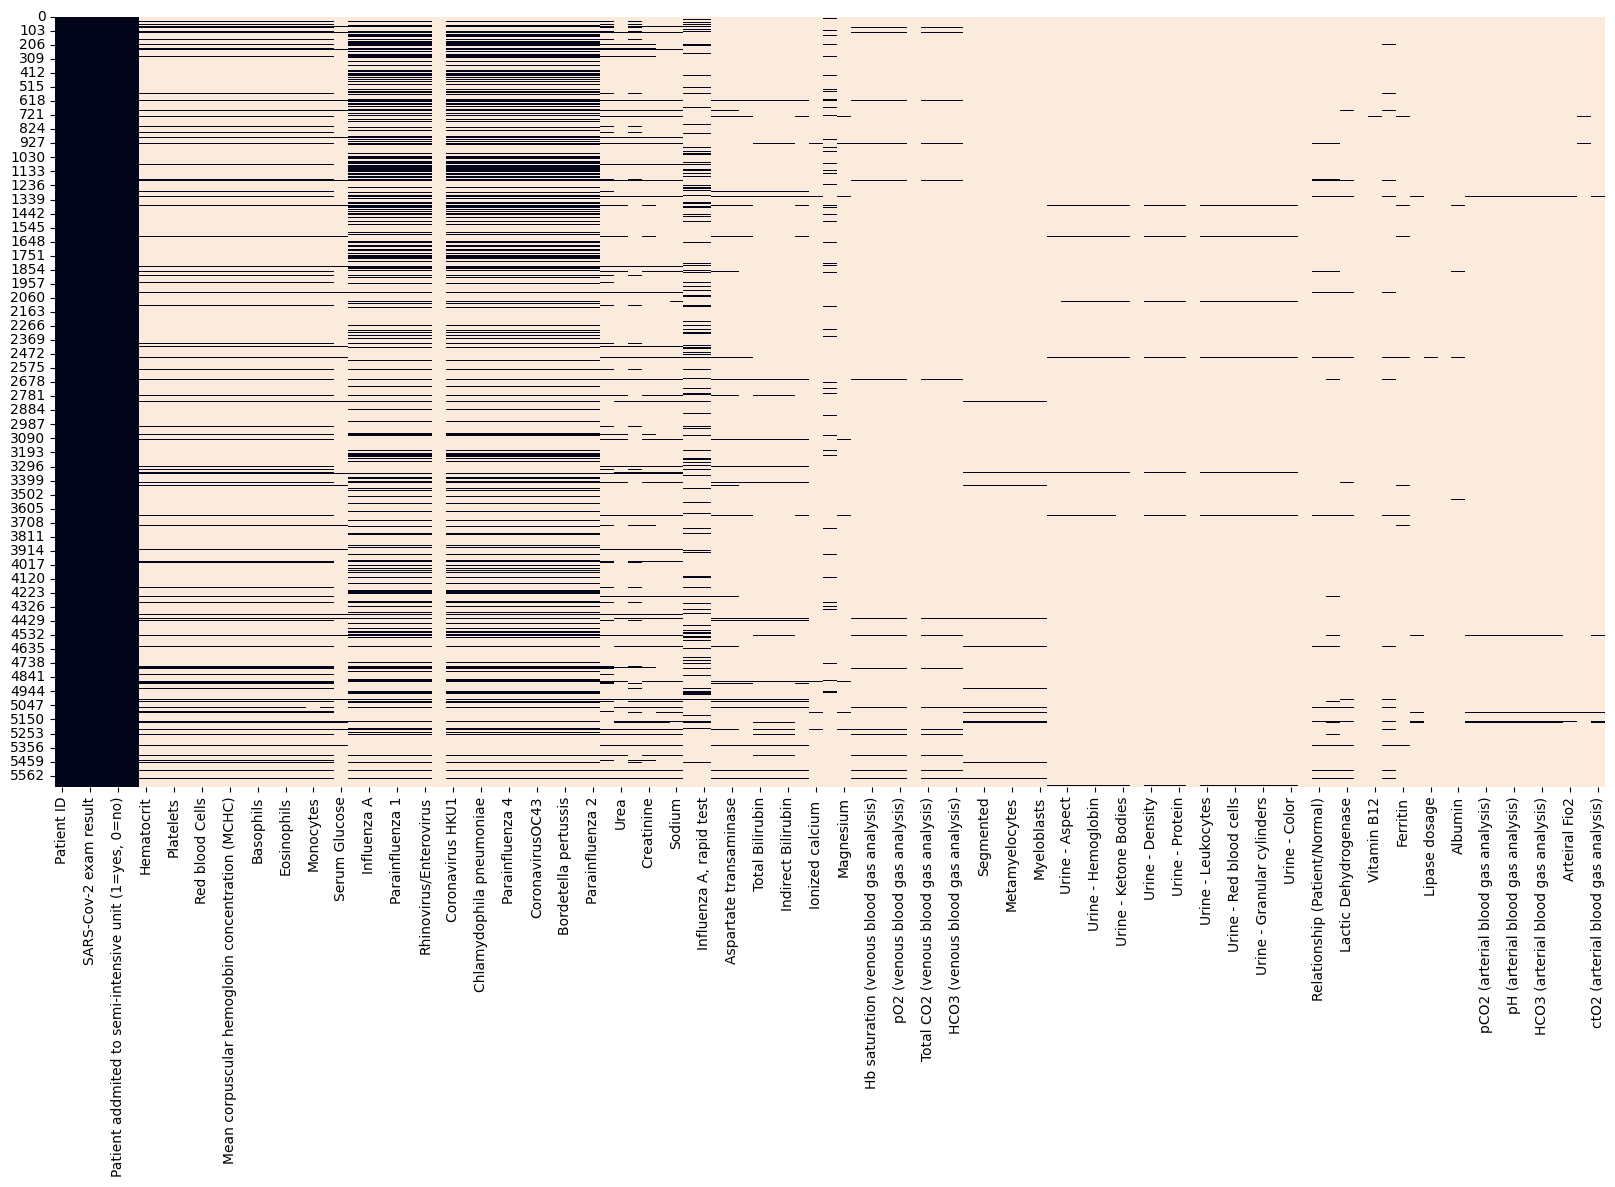

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [19]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse de Fond(Target)
* Elimination des colonnes inutiles


In [20]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.90]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

<Axes: >

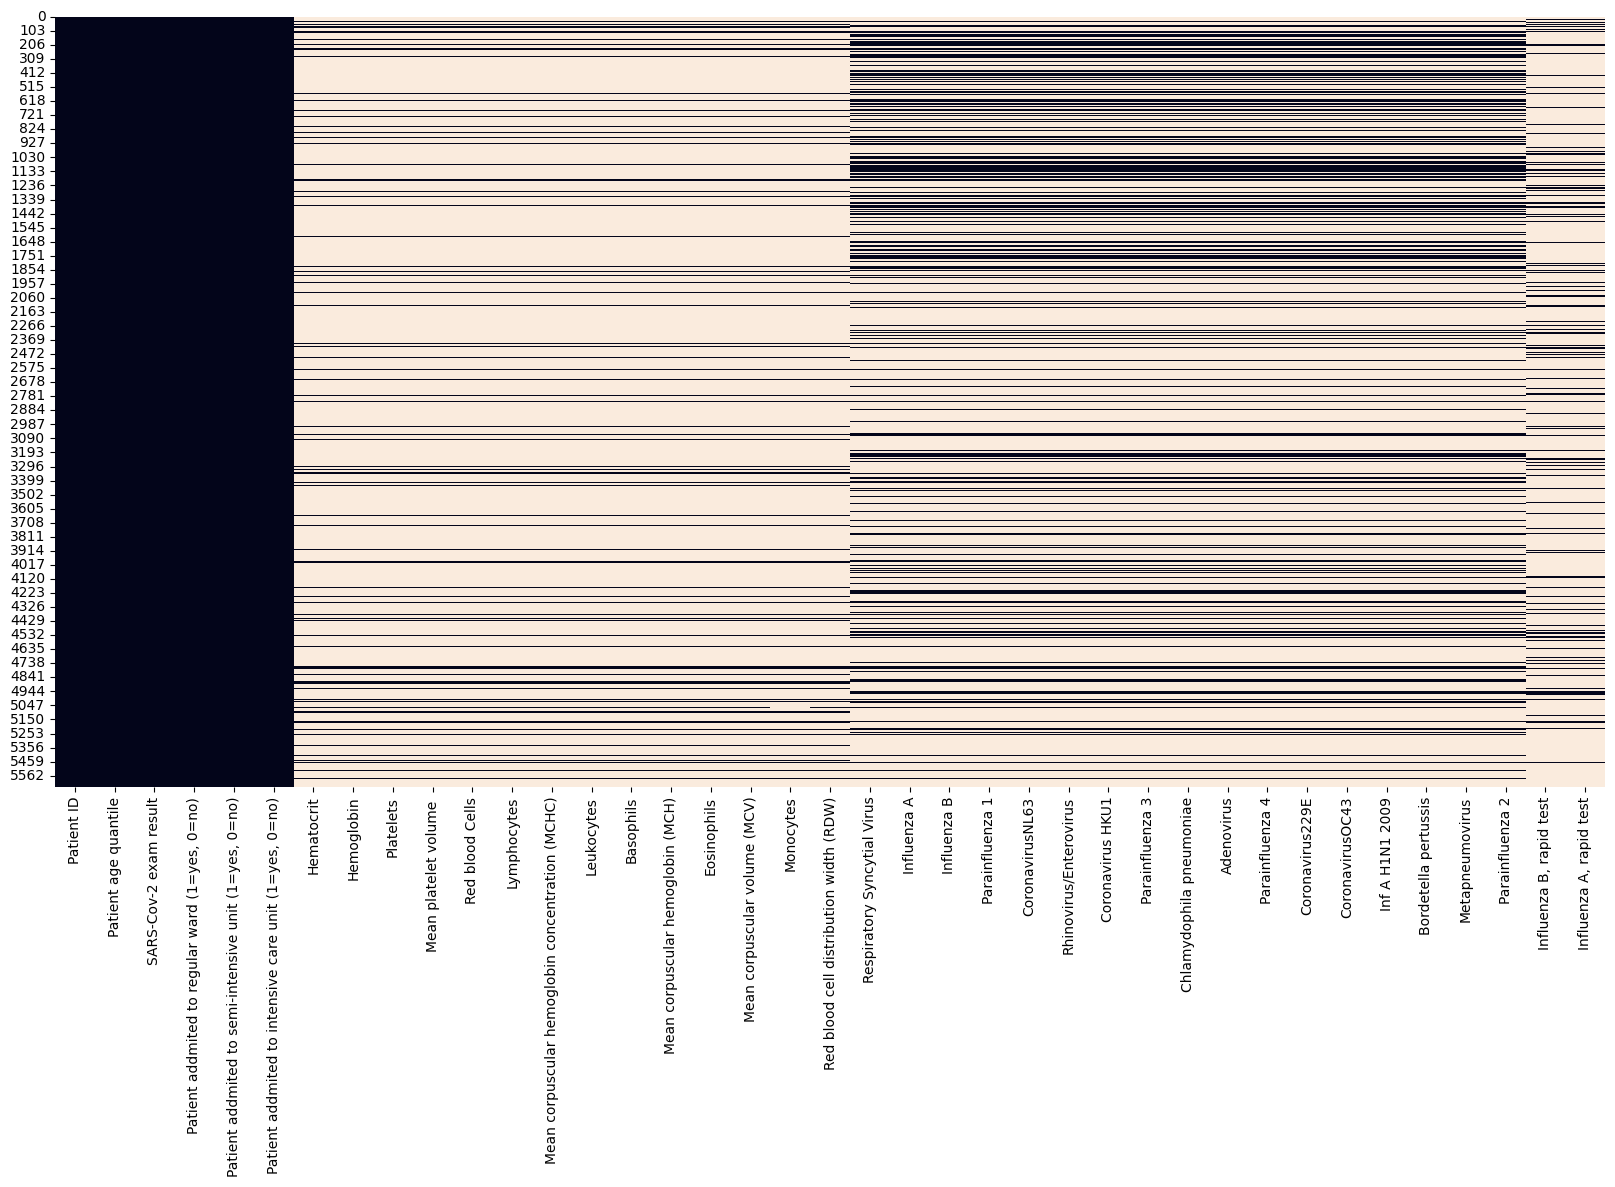

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [22]:
df=df.drop('Patient ID',axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

# Examen de la colonne target

In [23]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

# Histogrames des variables Continues

1. Variables de types float






<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

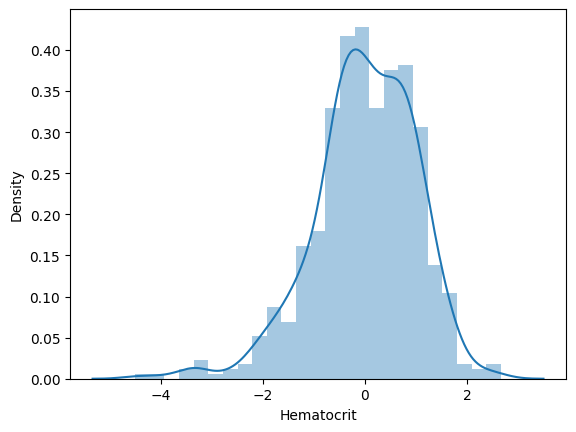

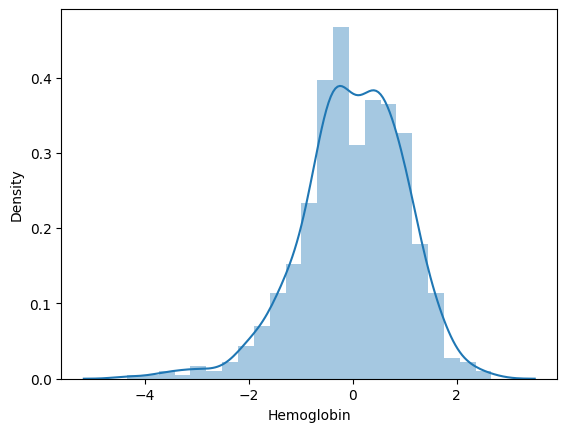

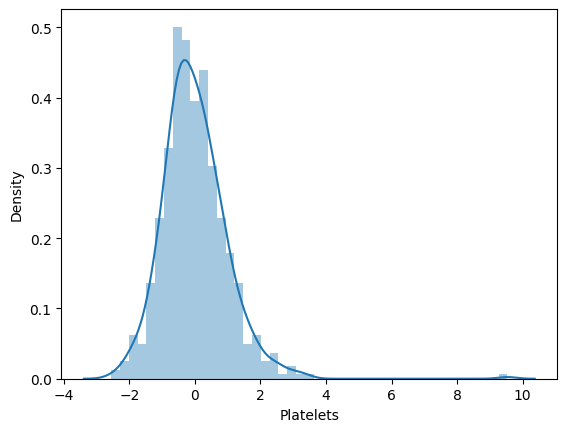

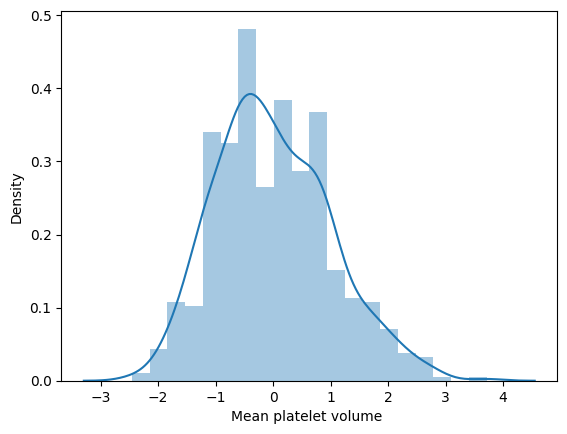

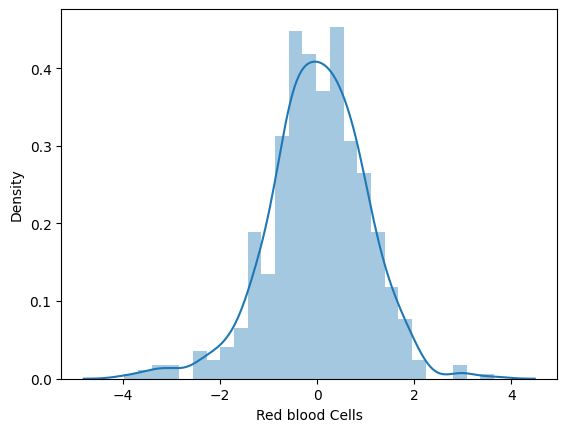

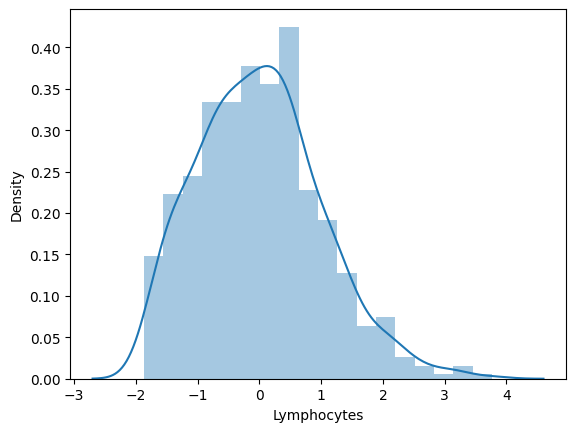

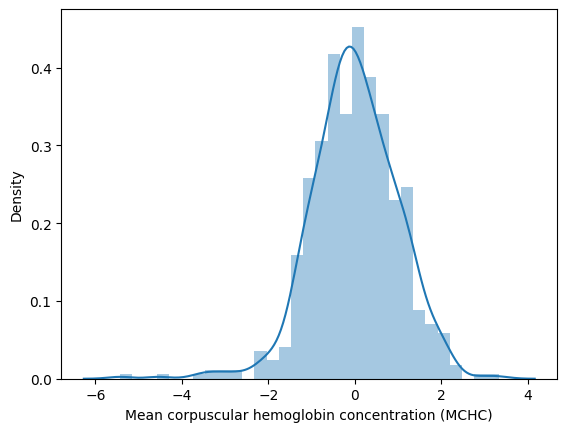

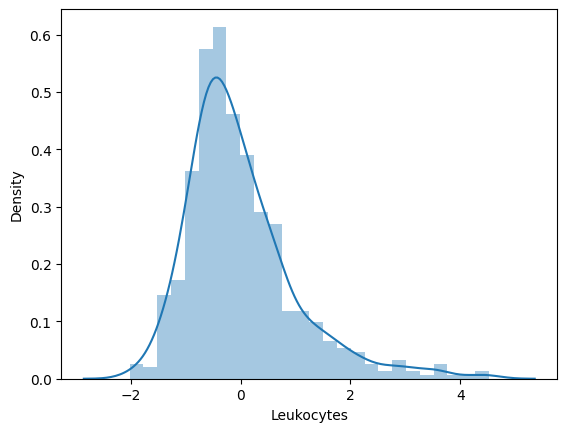

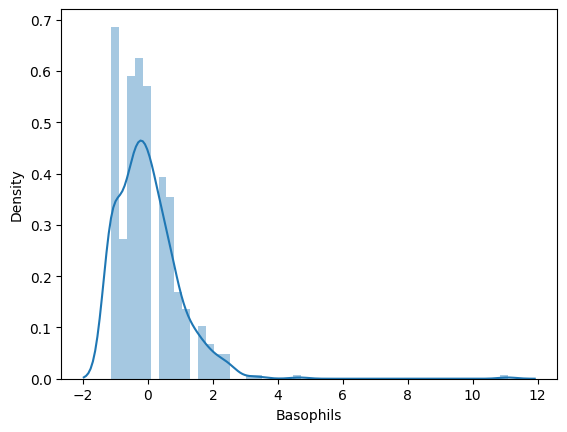

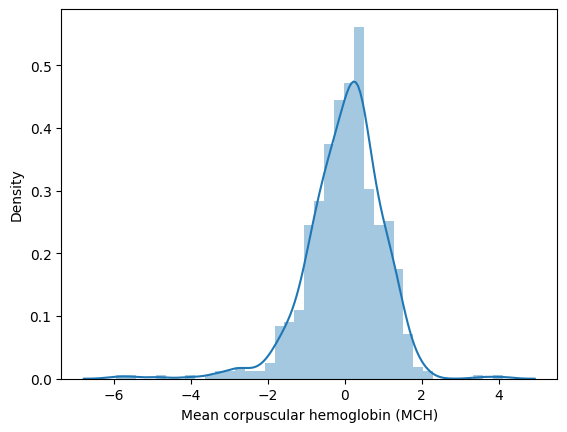

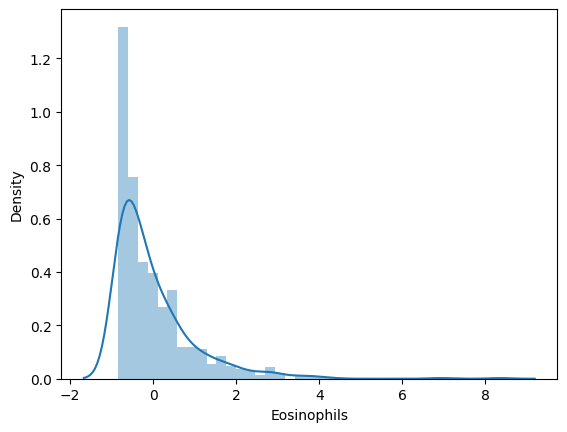

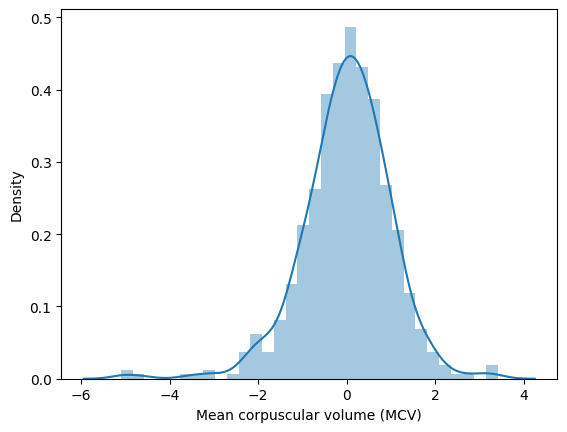

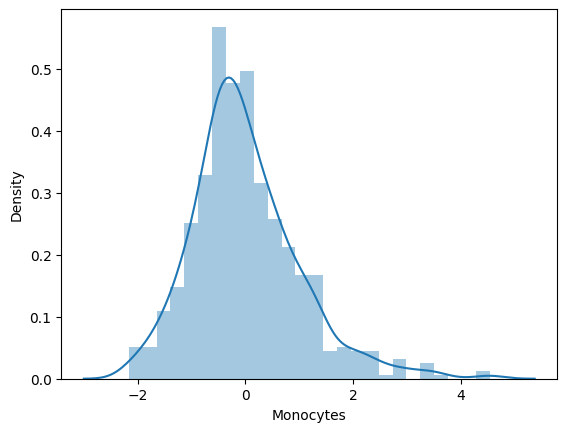

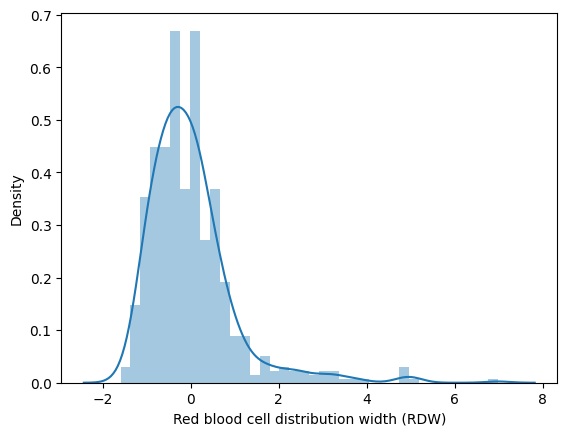

In [24]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

2. Variables de types int

<ipython-input-25-85a71a091f9e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'], bins=20)


<Axes: xlabel='Patient age quantile', ylabel='Density'>

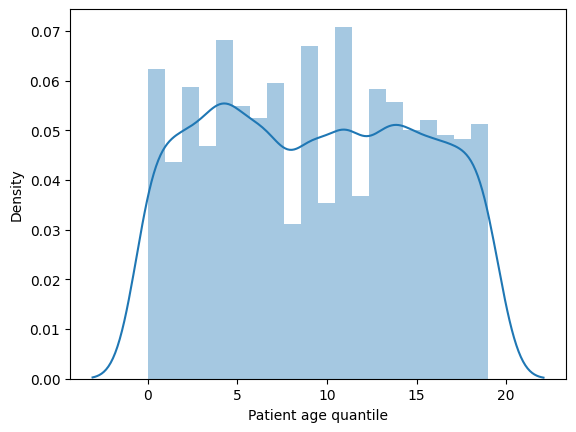

In [25]:
sns.distplot(df['Patient age quantile'], bins=20)

3. Variables de types object(Categorical)


In [26]:
for col in df.select_dtypes('object'):
  print(f'{col:-<50}{df[col].unique()}')

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

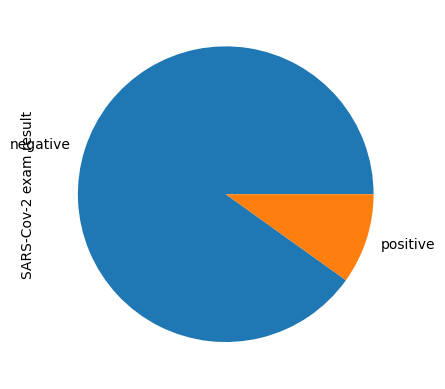

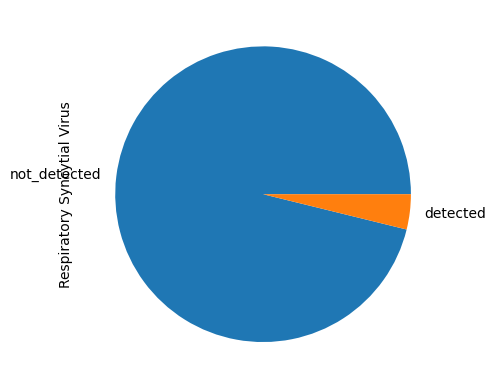

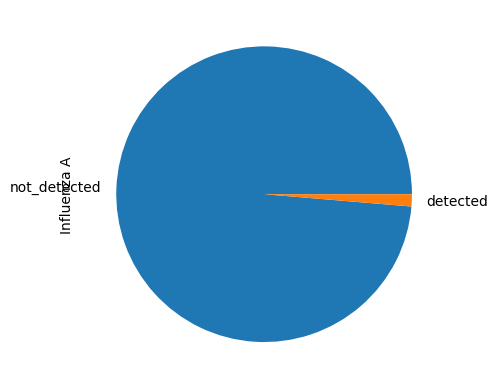

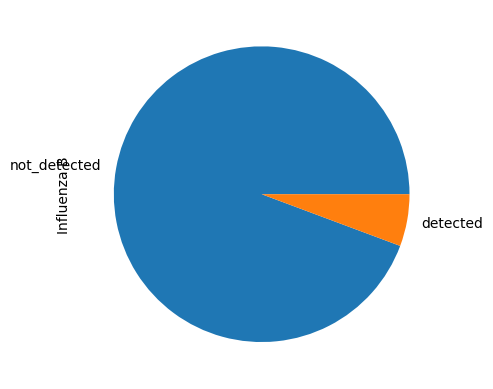

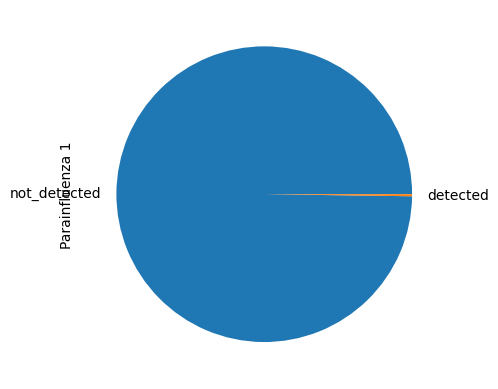

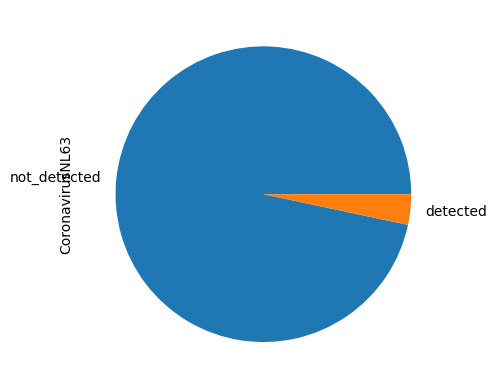

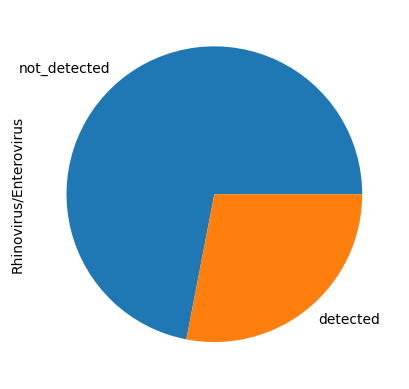

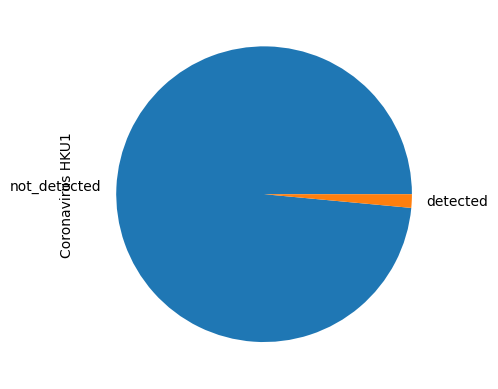

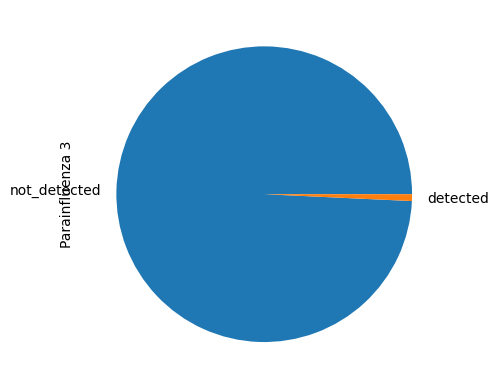

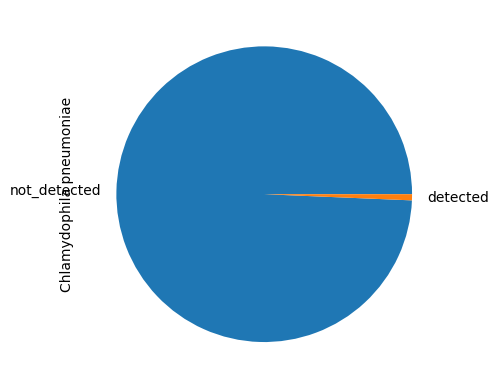

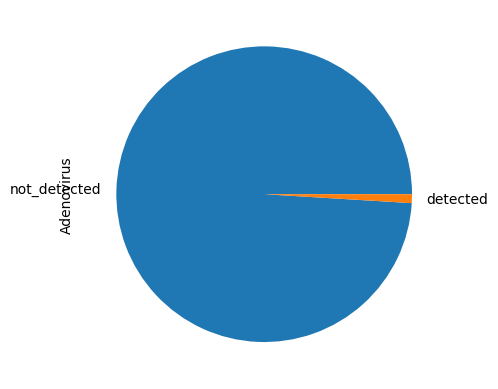

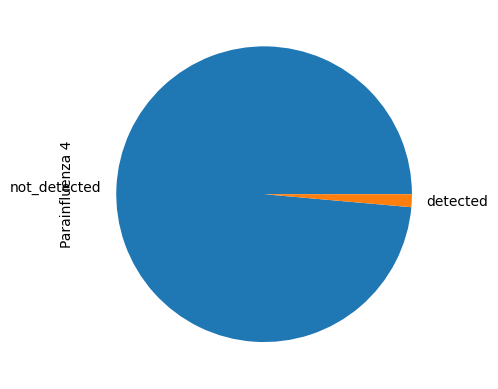

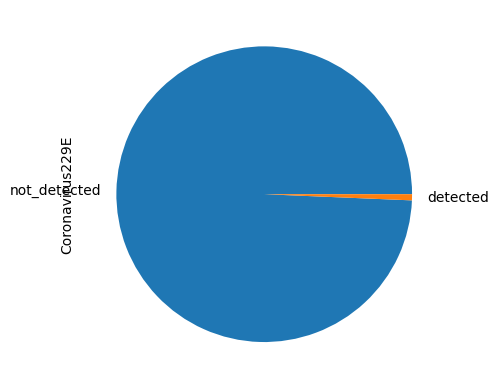

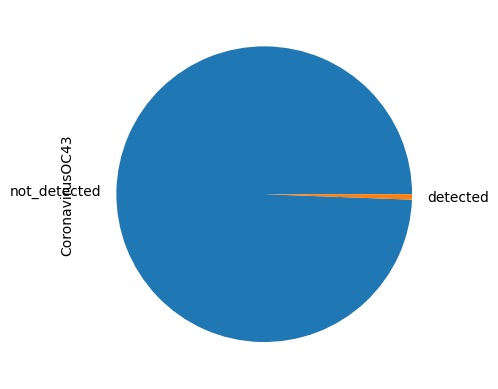

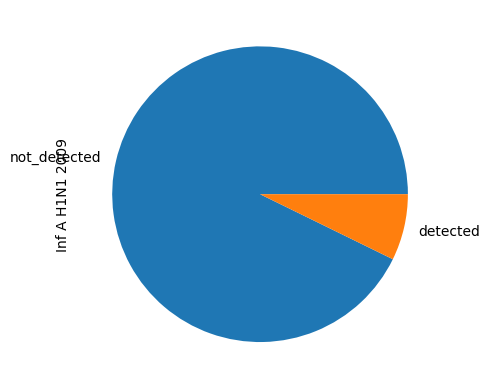

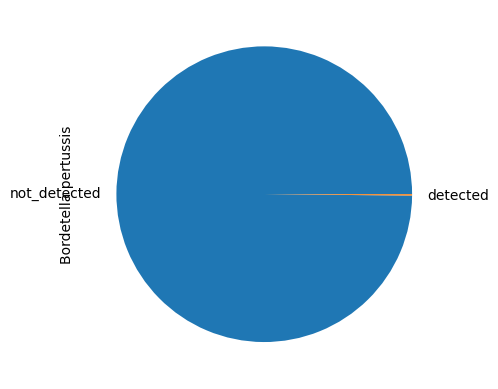

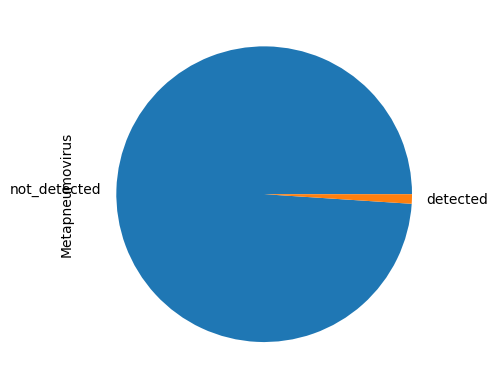

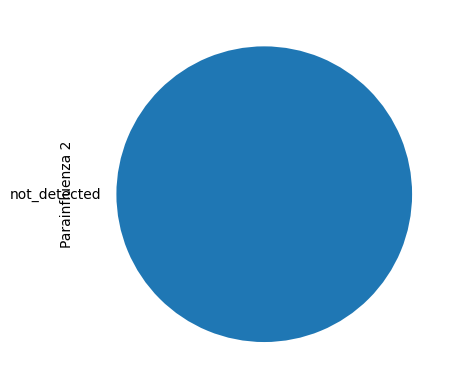

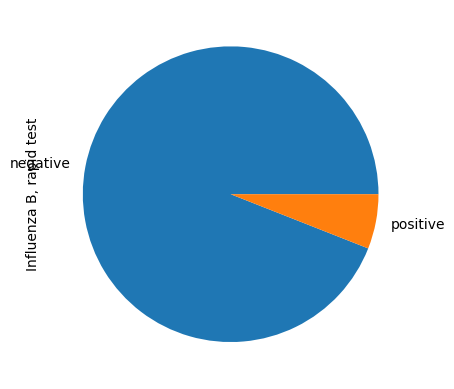

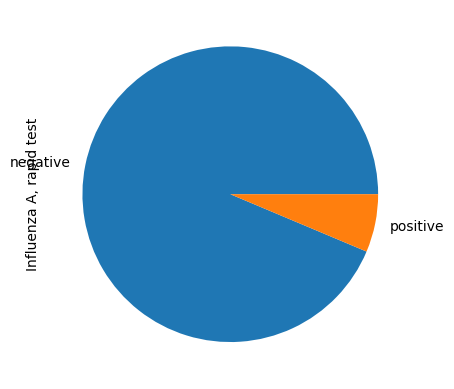

In [27]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()

# Relation Target/Variables

*   Création de sous-ensembles positifs et négatifs




In [28]:
positif_df=df[df['SARS-Cov-2 exam result']=='positive']

In [29]:
negatif_df=df[df['SARS-Cov-2 exam result']=='negative']

# Création des ensembles Blood/Viral

In [30]:
missing_rate=df.isna().sum()/df.shape[0]

In [31]:
Blood_columns=df.columns[(missing_rate<0.9)&(missing_rate>0.88)]
Viral_columns=df.columns[(missing_rate<0.88)&(missing_rate>0.75)]

# Visualisation Target/Blood

<ipython-input-32-705ab0ddd71c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positif_df[col],label='positive')
<ipython-input-32-705ab0ddd71c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negatif_df[col],label='negative')
<ipython-input-32-705ab0ddd71c>:3: UserWarning: 

`distplot` is a 

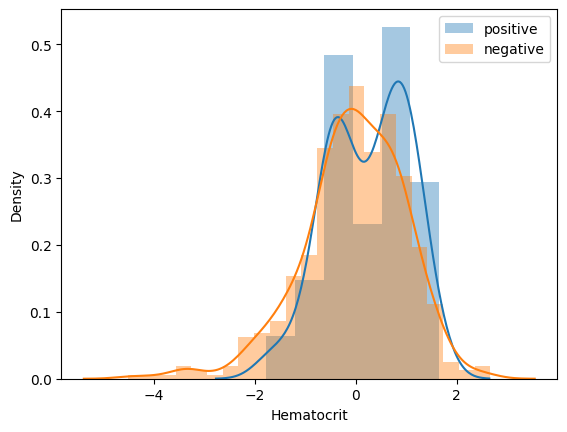

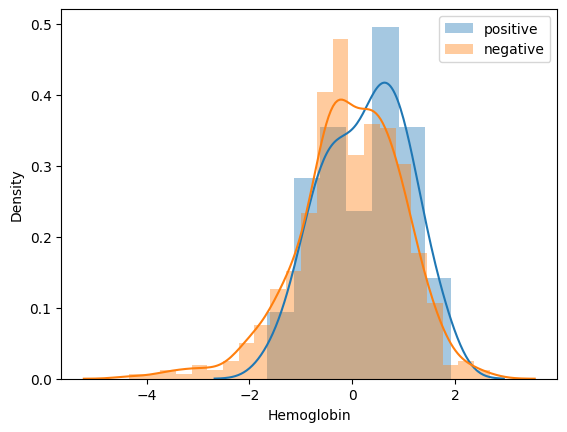

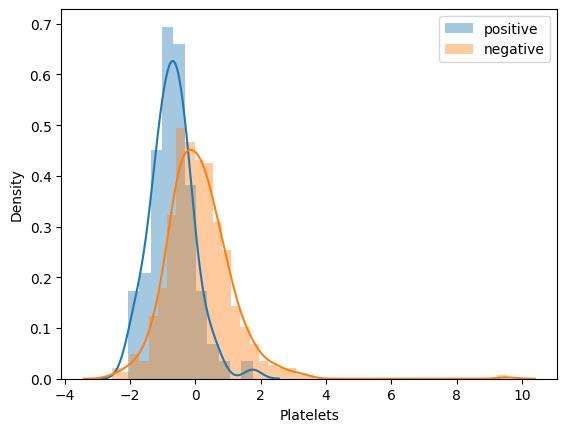

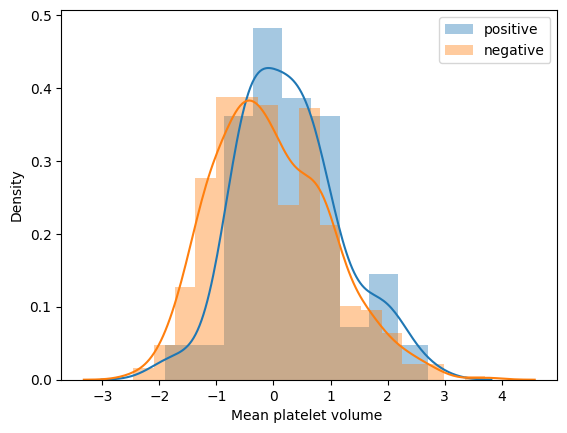

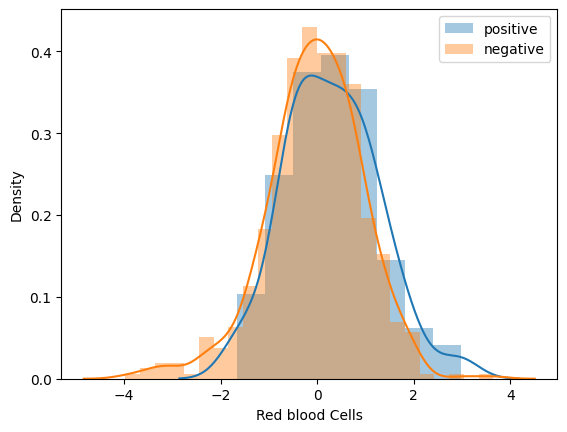

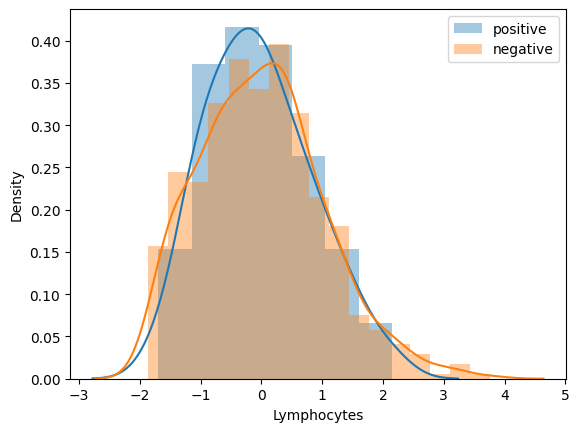

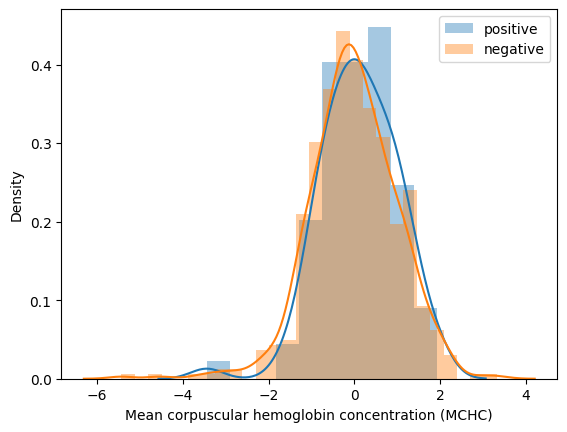

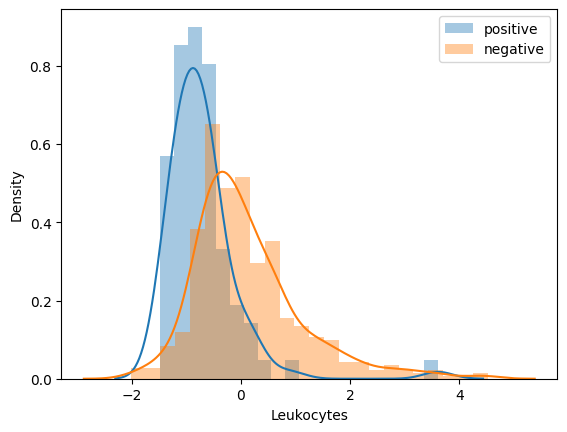

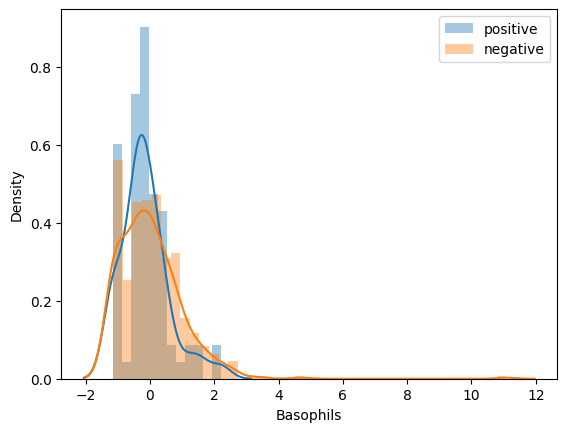

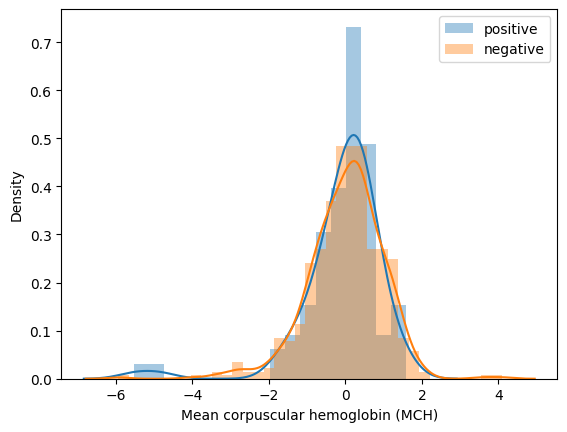

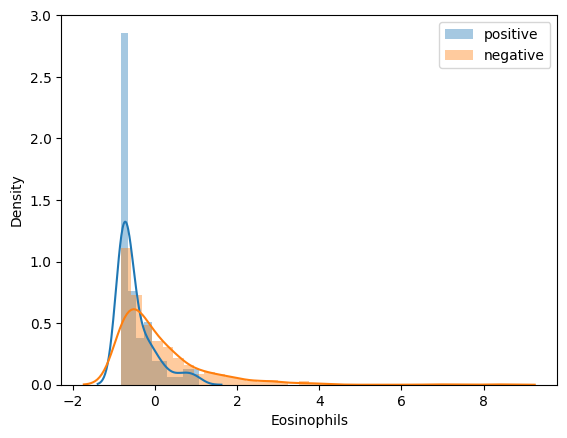

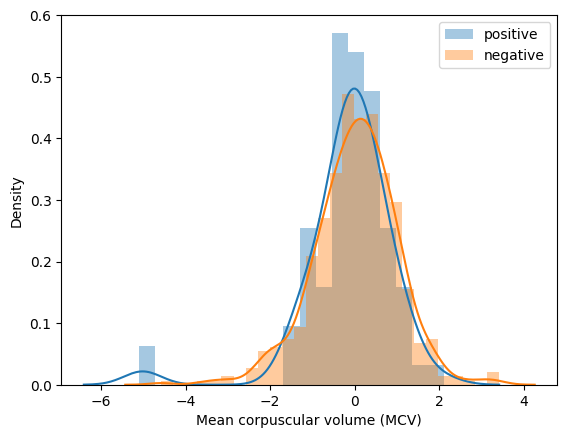

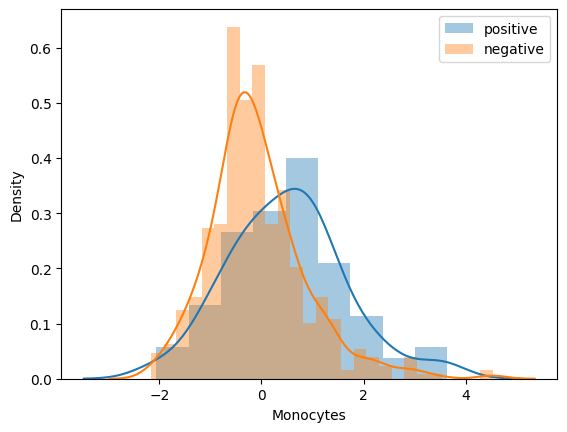

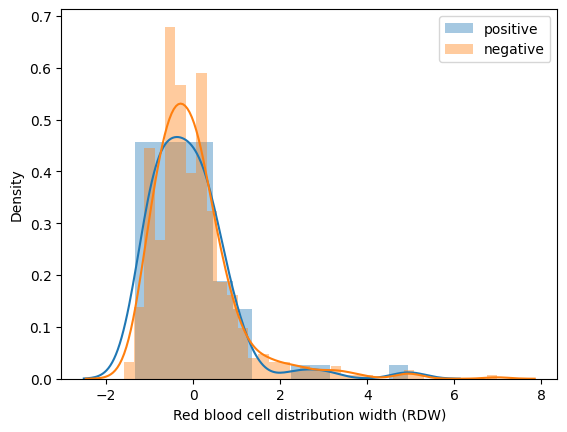

In [32]:
for col in Blood_columns:
  plt.figure()
  sns.distplot(positif_df[col],label='positive')
  sns.distplot(negatif_df[col],label='negative')
  plt.legend()

# Relation Target/Age

<Axes: xlabel='Patient age quantile', ylabel='count'>

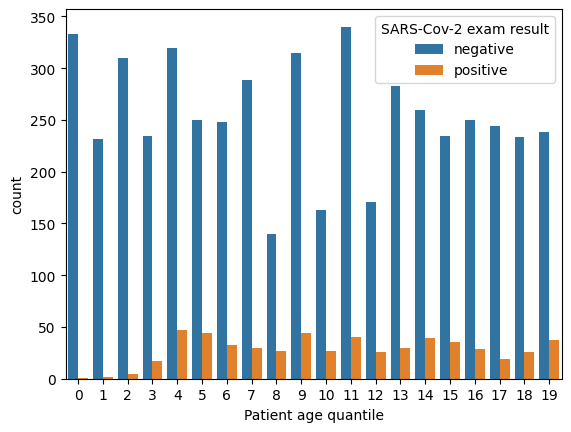

In [33]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

# Ralation Target/ Viral(Categorical)

In [34]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

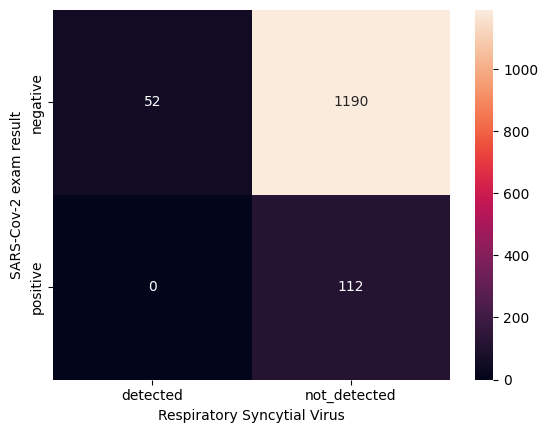

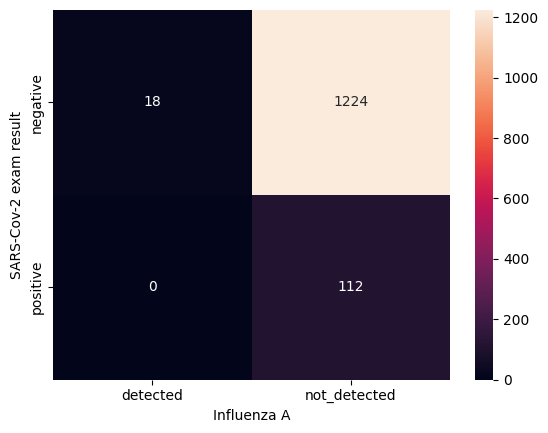

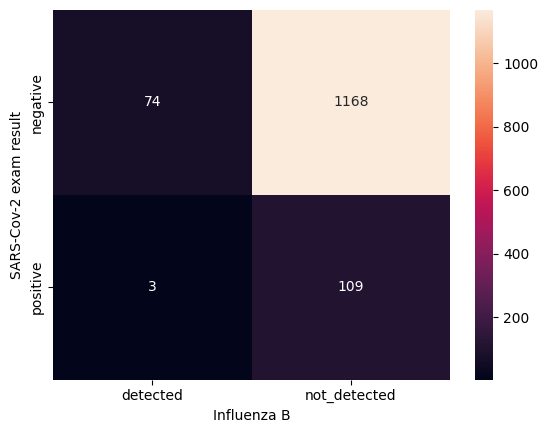

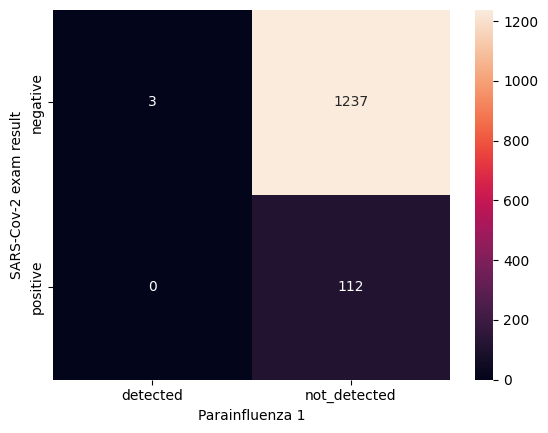

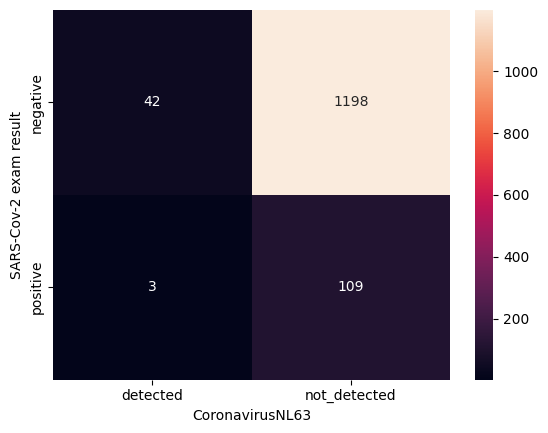

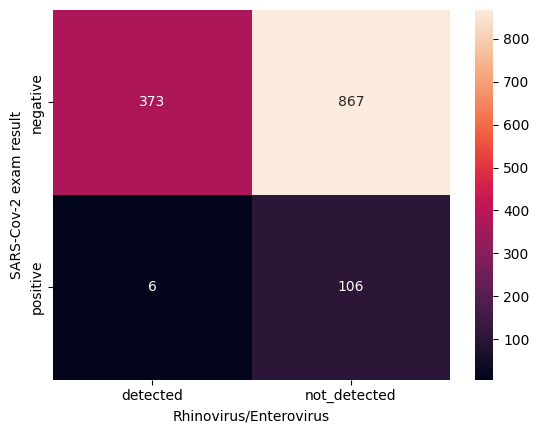

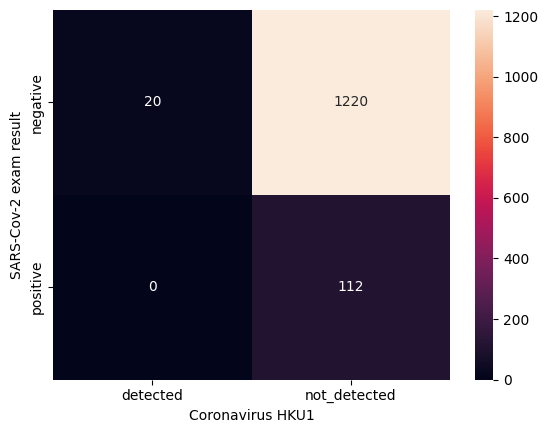

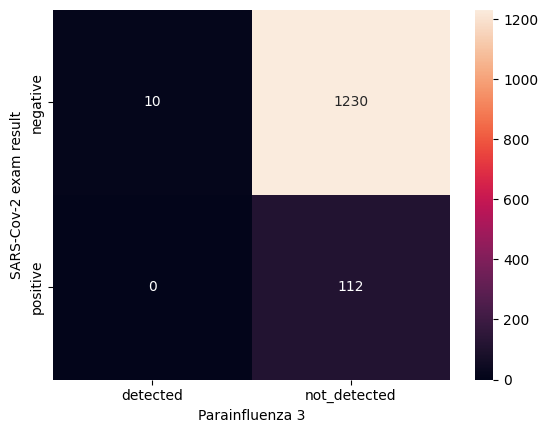

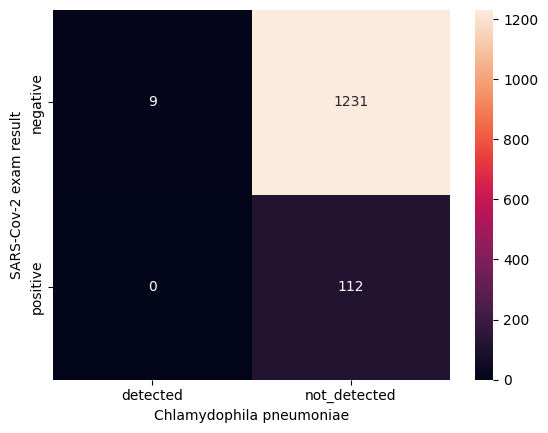

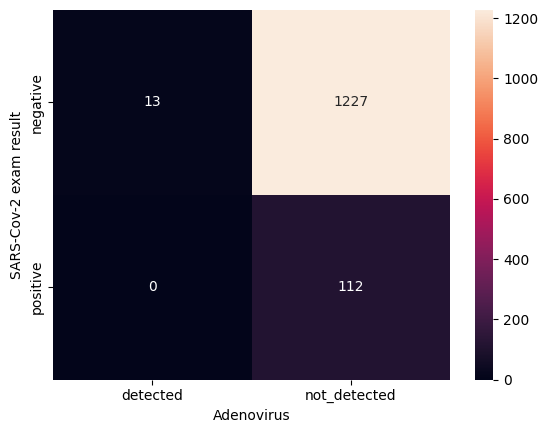

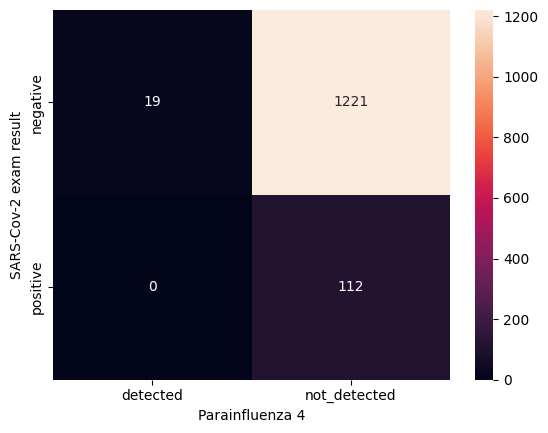

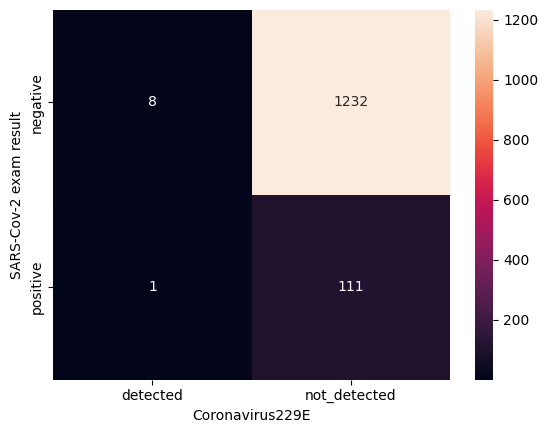

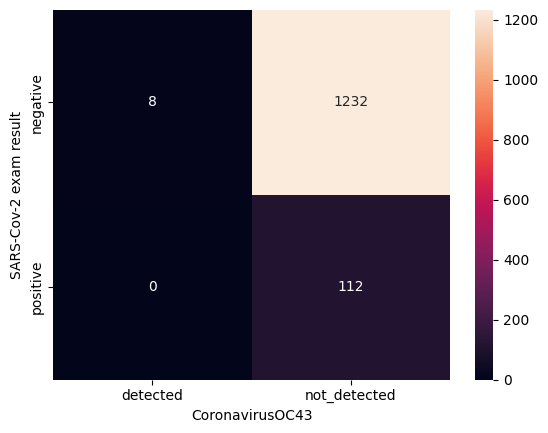

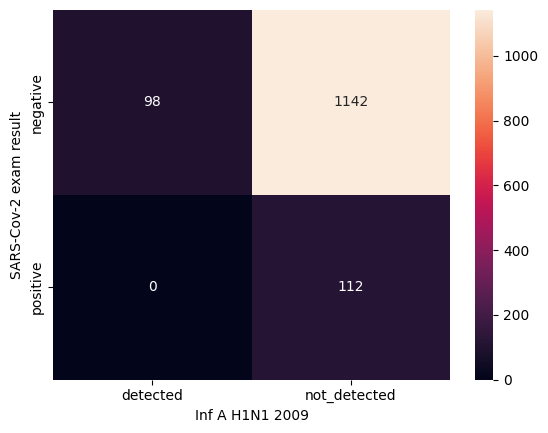

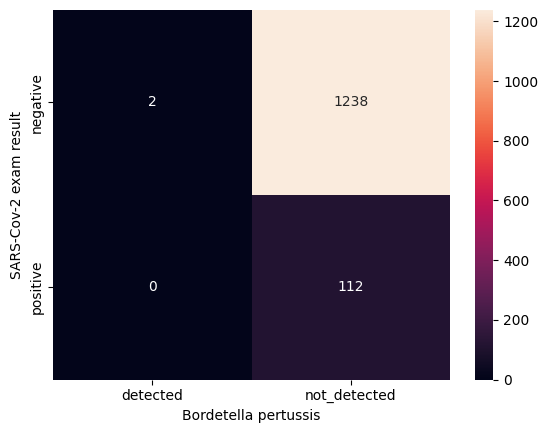

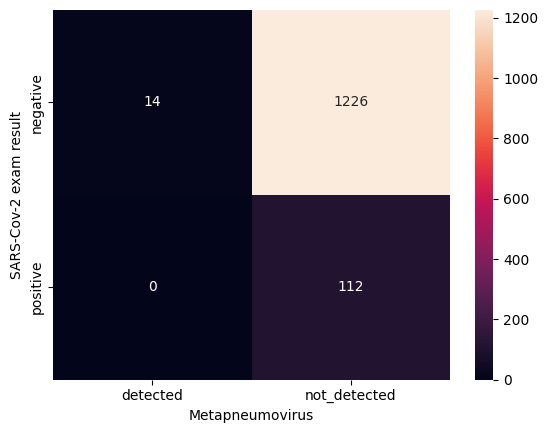

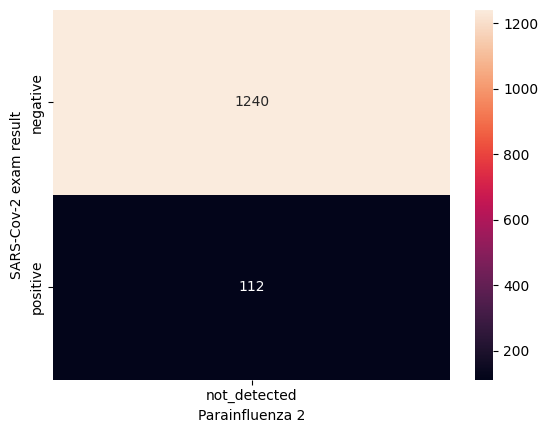

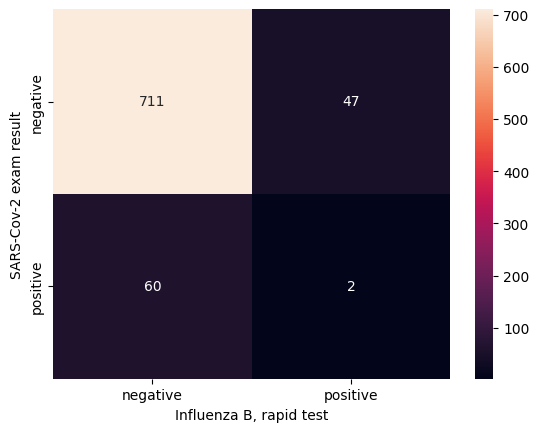

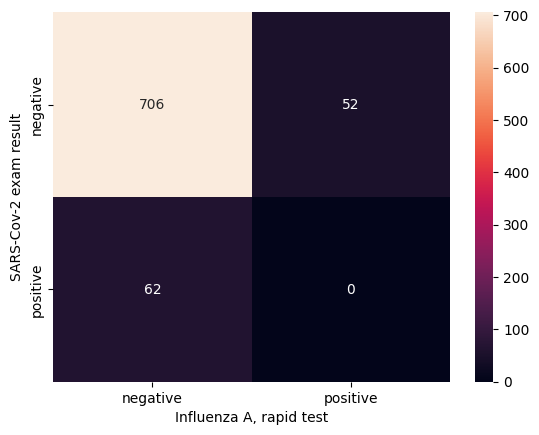

In [35]:
for col in Viral_columns:
  plt.figure()
  sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d'  )

# Analyse plus Avancé
* Relation Variables/Variables
* Relation Taux Sanguin

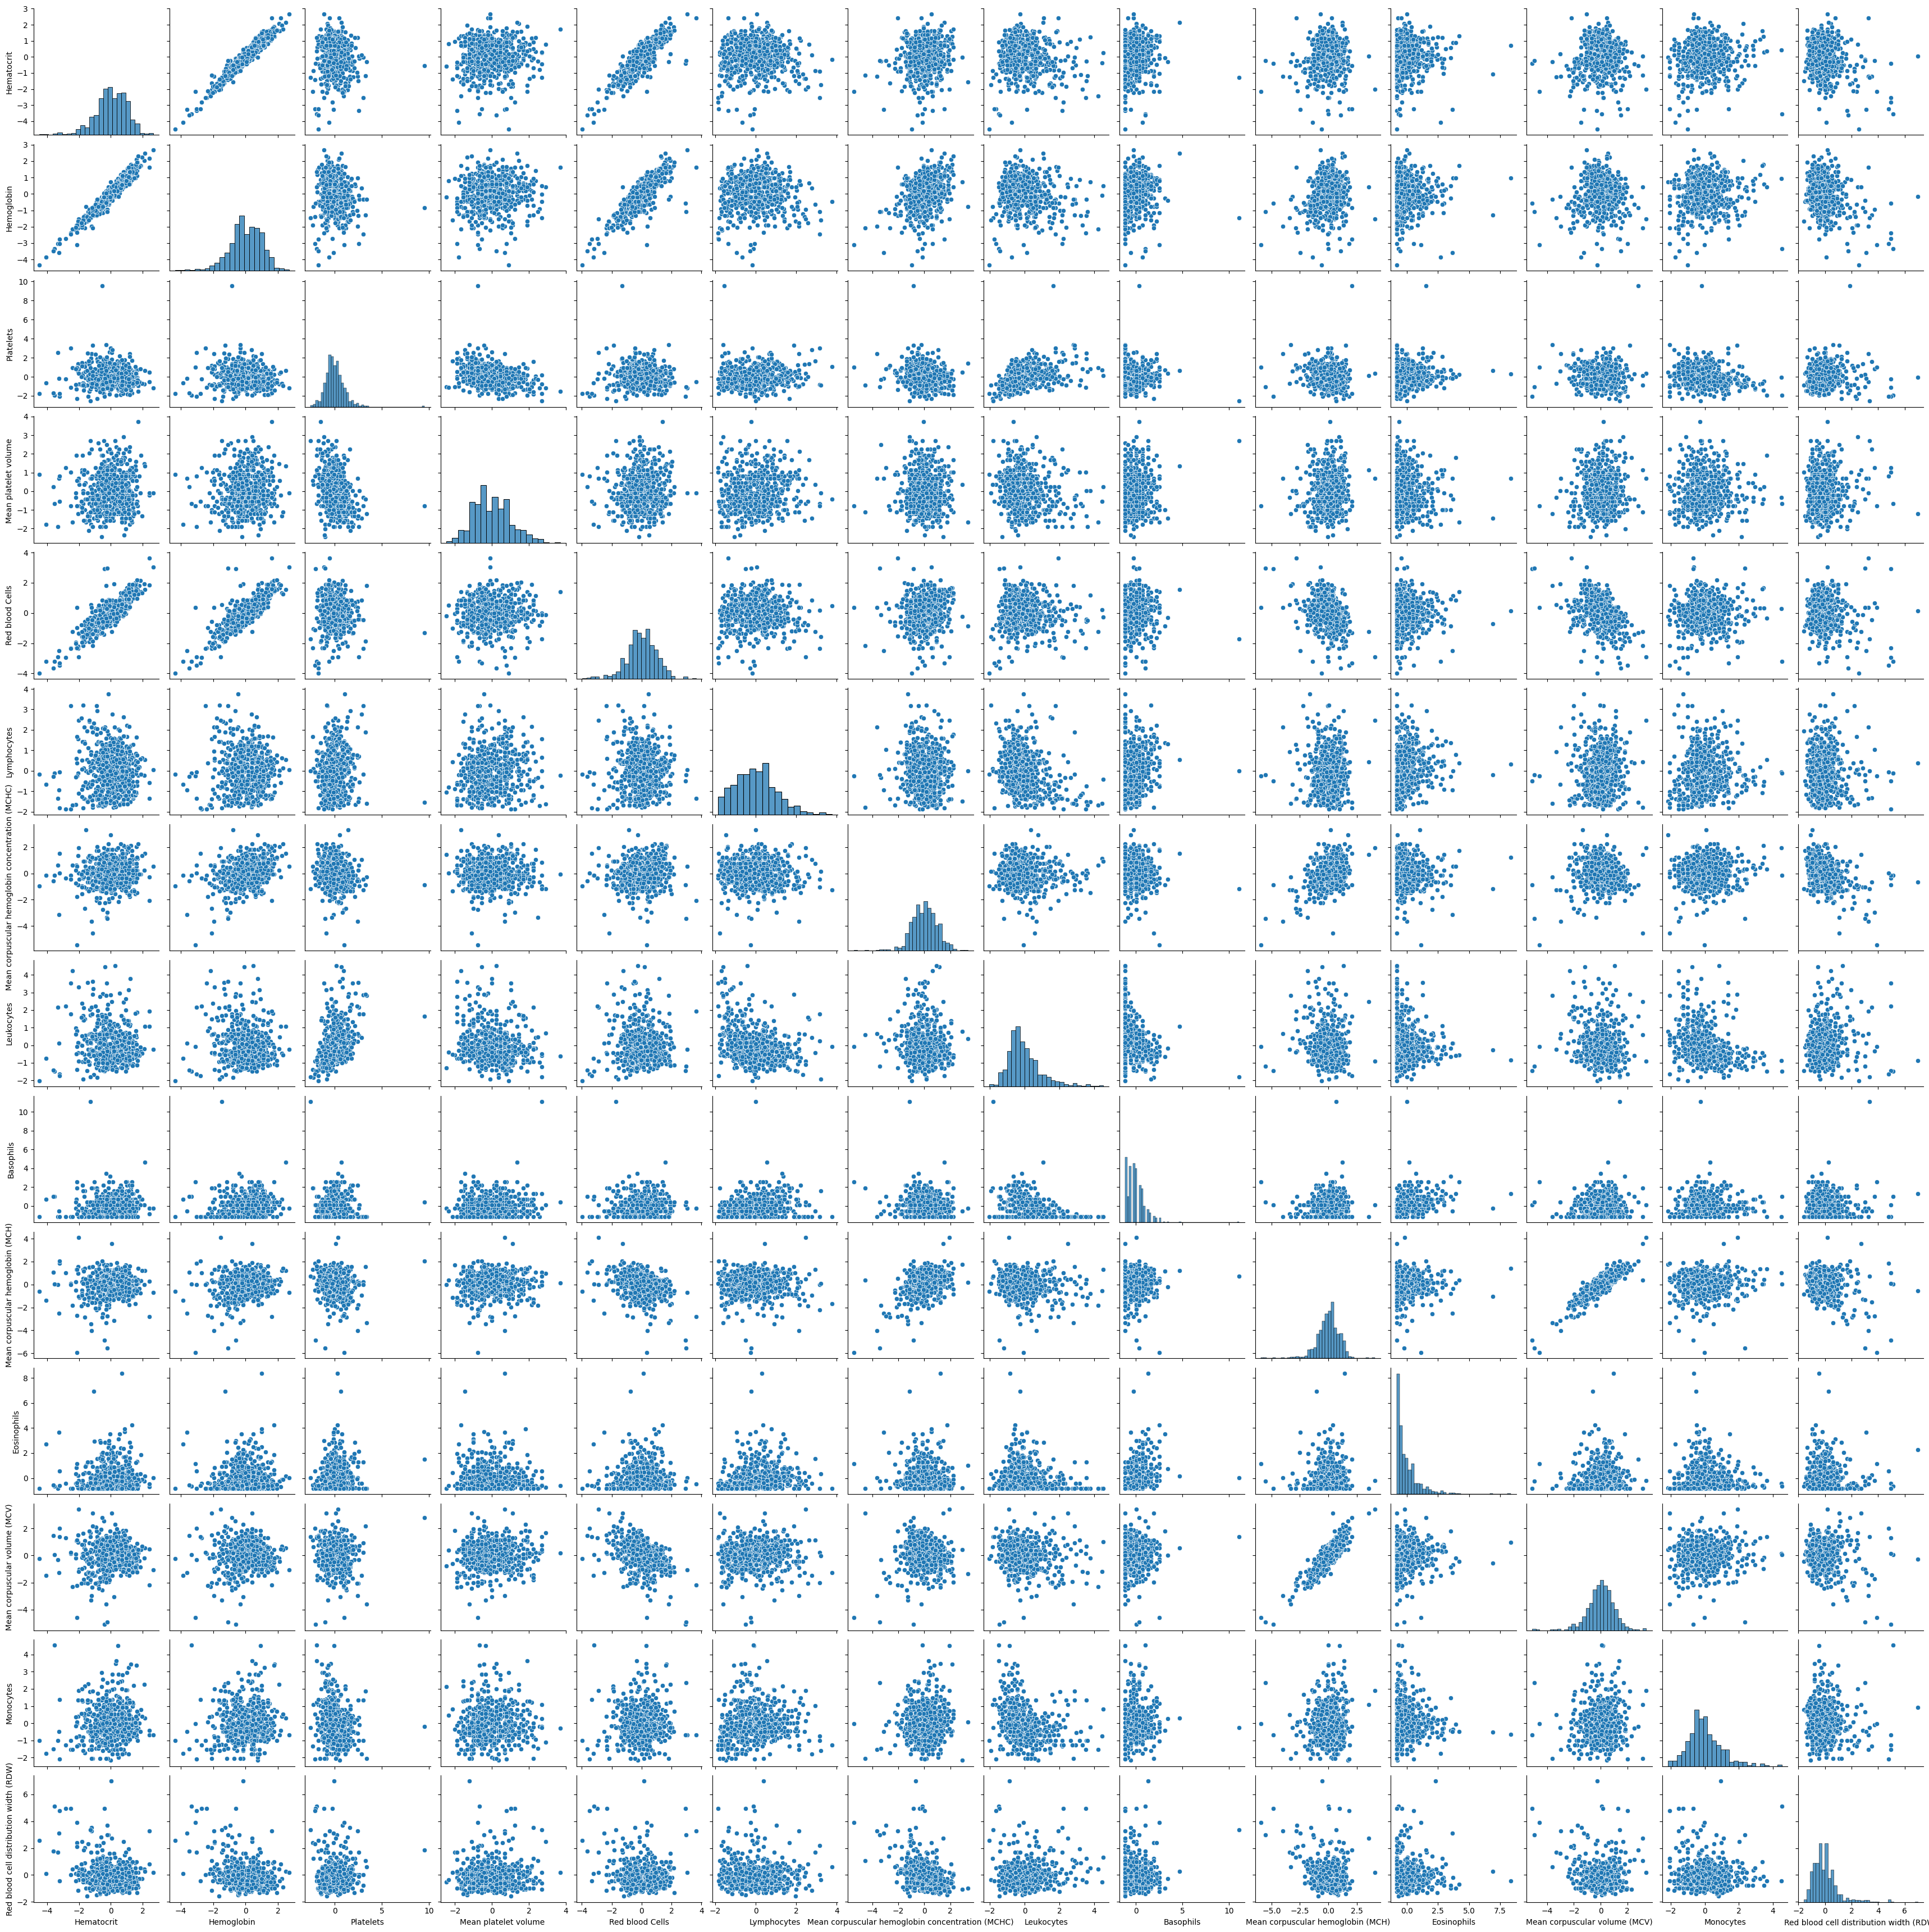

In [36]:
sns.pairplot(df[Blood_columns])

<Axes: >

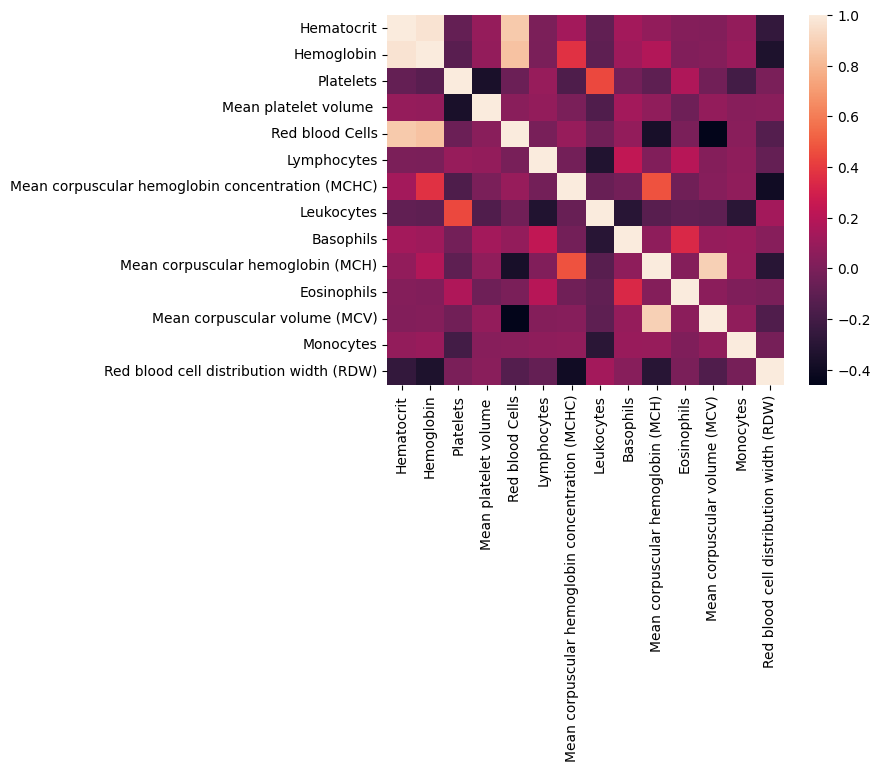

In [37]:
sns.heatmap(df[Blood_columns].corr())

# Relation Age / Sang

<ipython-input-38-165705924bc2>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

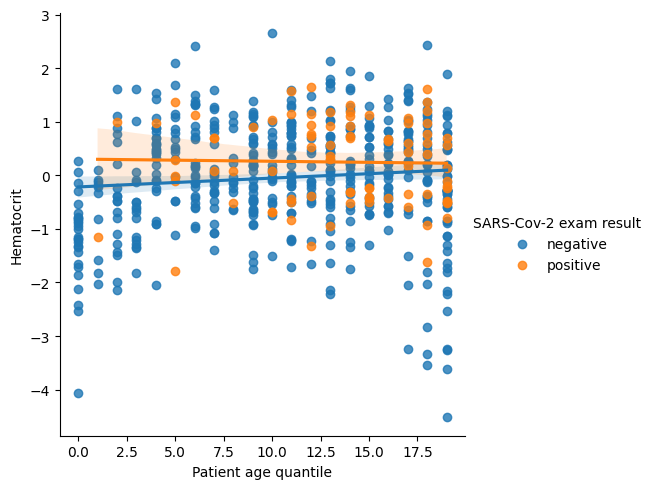

<Figure size 640x480 with 0 Axes>

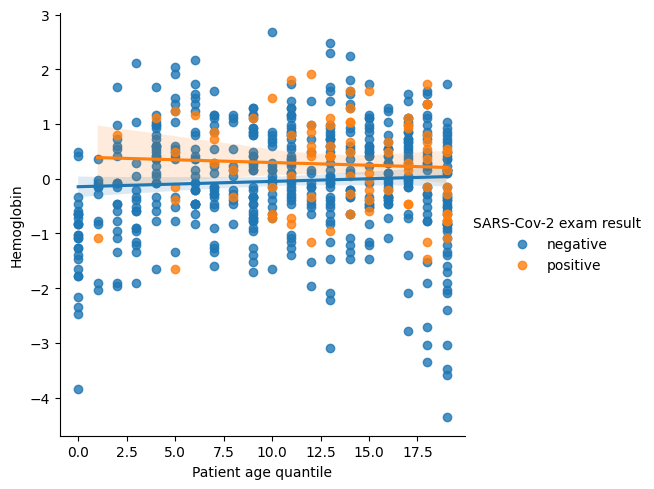

<Figure size 640x480 with 0 Axes>

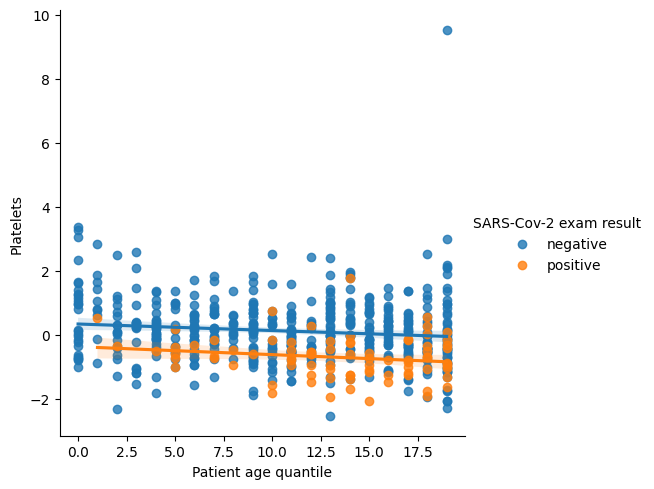

<Figure size 640x480 with 0 Axes>

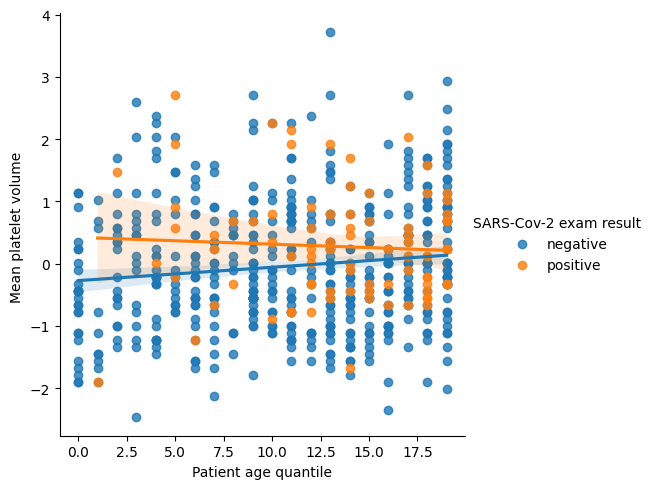

<Figure size 640x480 with 0 Axes>

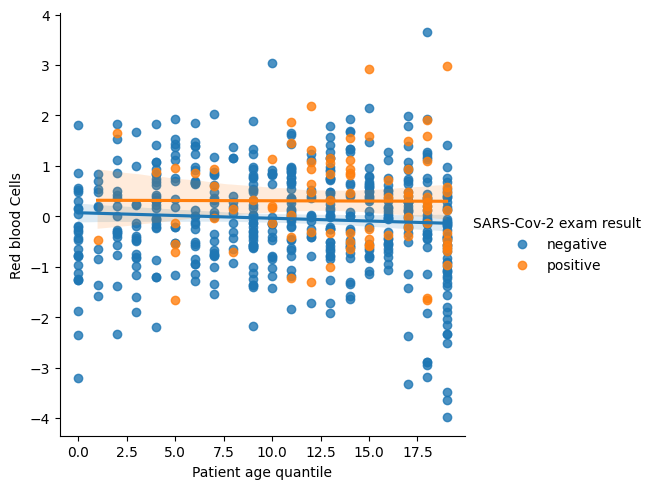

<Figure size 640x480 with 0 Axes>

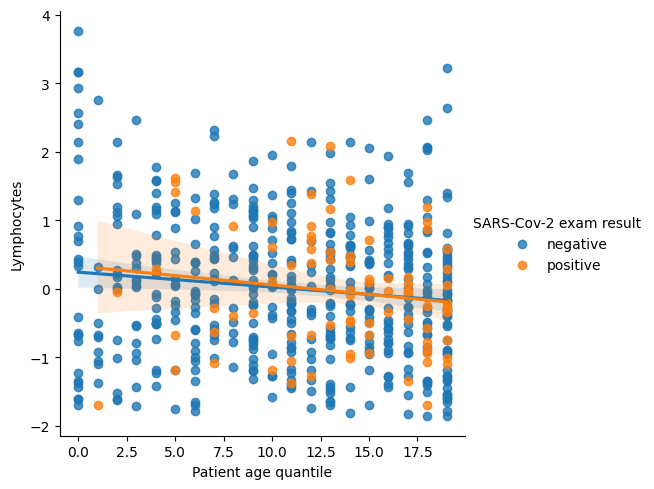

<Figure size 640x480 with 0 Axes>

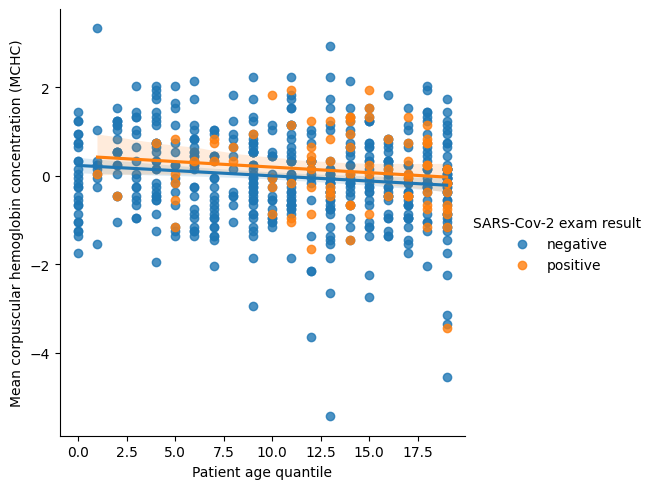

<Figure size 640x480 with 0 Axes>

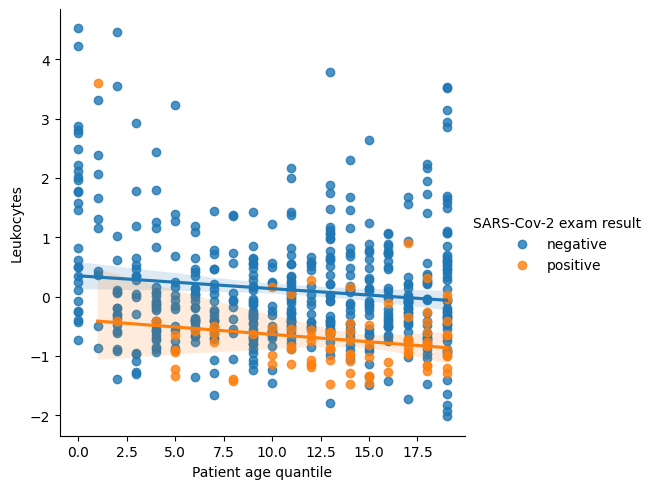

<Figure size 640x480 with 0 Axes>

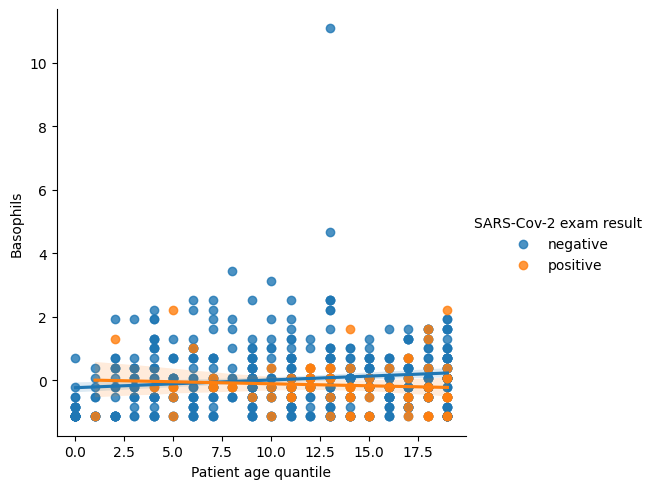

<Figure size 640x480 with 0 Axes>

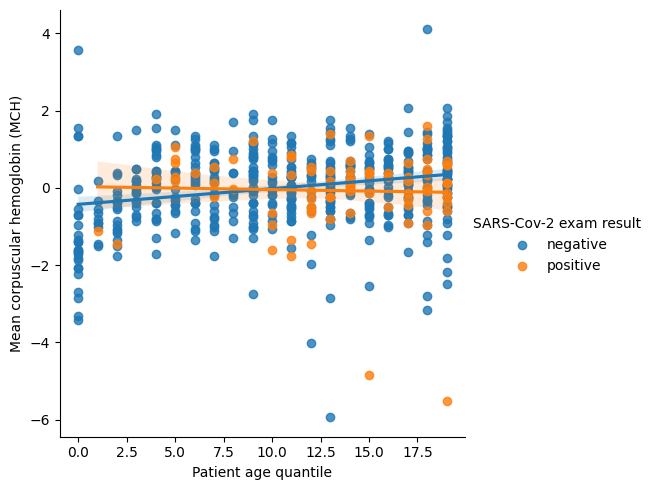

<Figure size 640x480 with 0 Axes>

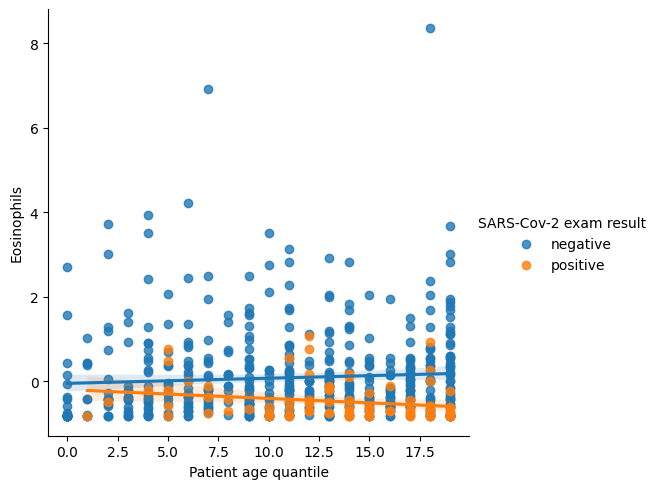

<Figure size 640x480 with 0 Axes>

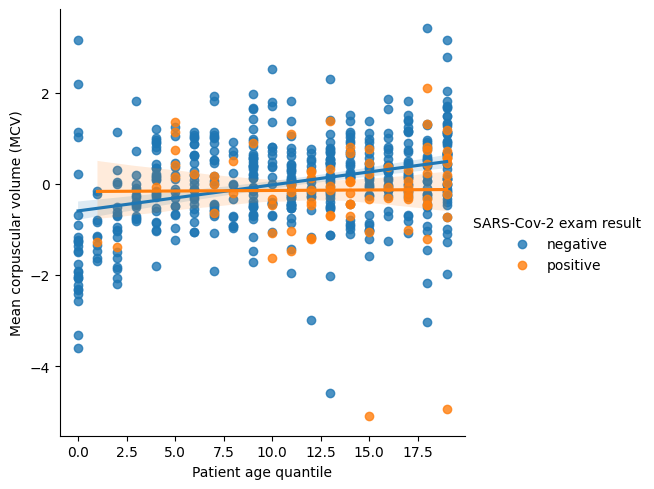

<Figure size 640x480 with 0 Axes>

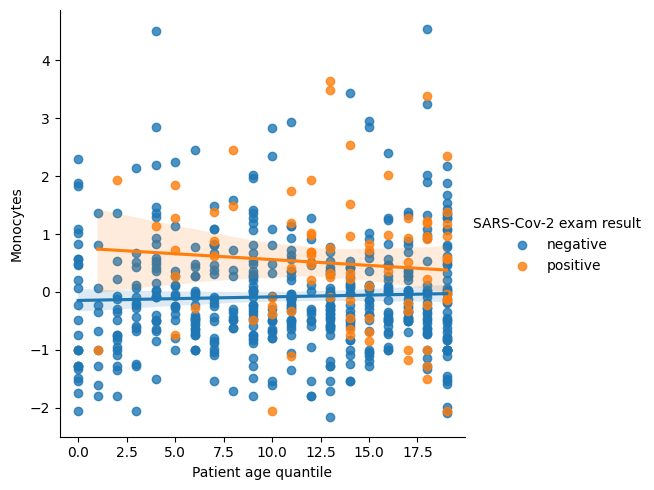

<Figure size 640x480 with 0 Axes>

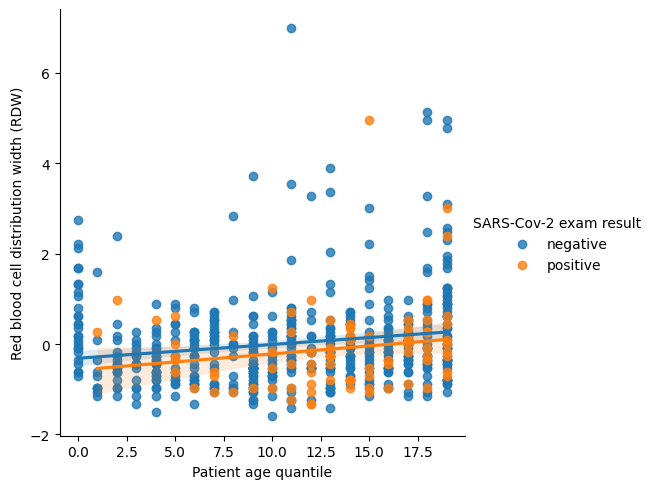

In [38]:
for col in Blood_columns:
  plt.figure()
  sns.lmplot(x='Patient age quantile',y=col , hue='SARS-Cov-2 exam result',data=df)

# Relation entre Influenza et rapid test


In [39]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [40]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

# Relation Viral / Sanguin
* creation d'une nouvelle variable "est malade"

In [41]:
df["est malade"]=np.sum(df[Viral_columns[:-2]]=='detected',axis=1)>=1
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [42]:
malade_df=df[df['est malade']==True]
non_malade_df=df[df['est malade']==False]

<ipython-input-43-fc38bfd2ea43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col],label="malade")
<ipython-input-43-fc38bfd2ea43>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col],label="non malade")
<ipython-input-43-fc38bfd2ea43>:3: UserWarning: 

`distplot` is 

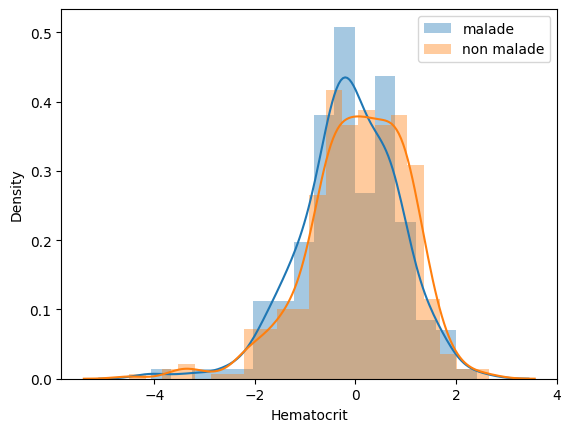

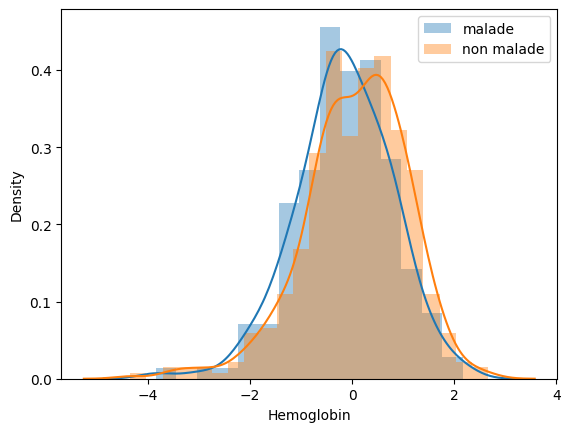

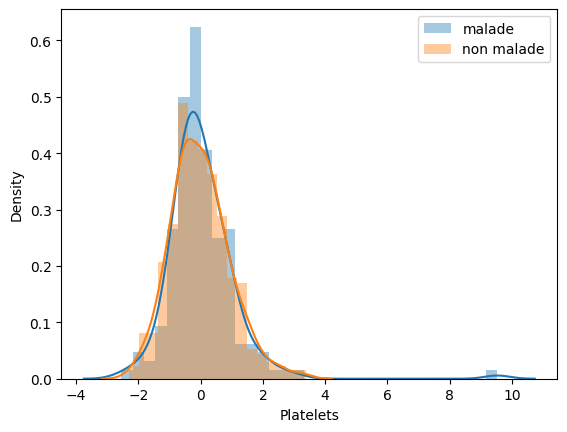

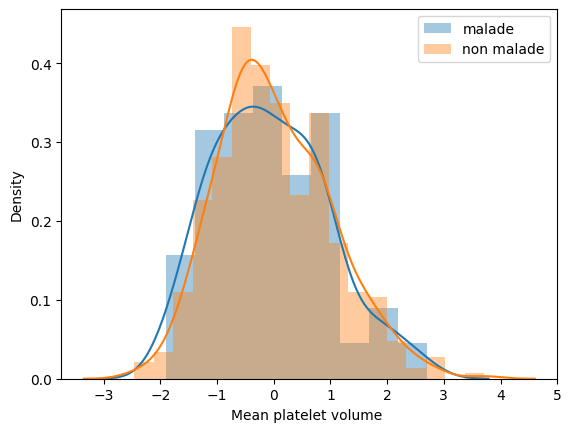

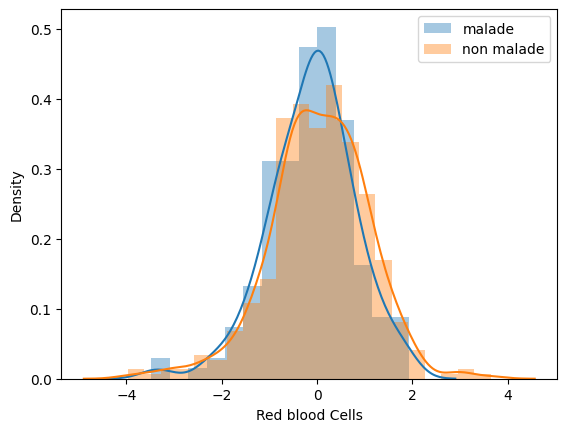

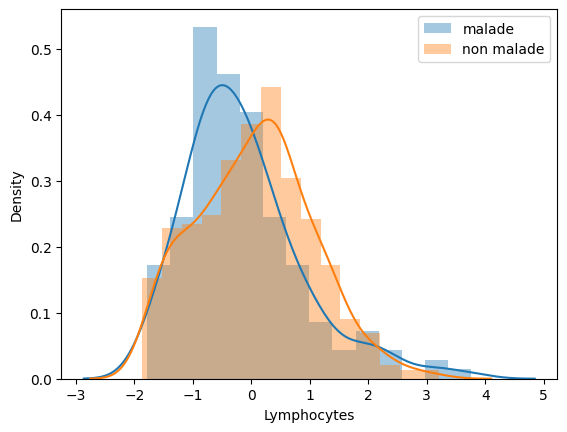

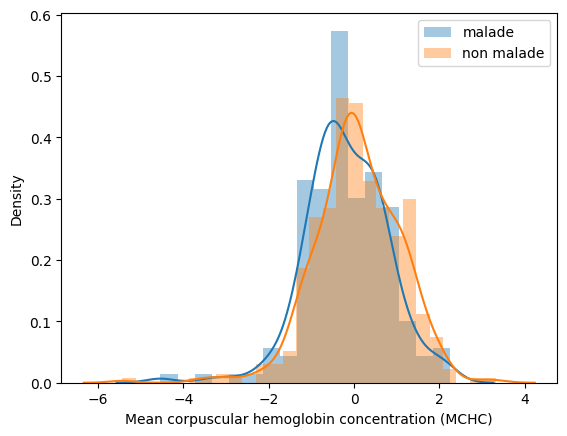

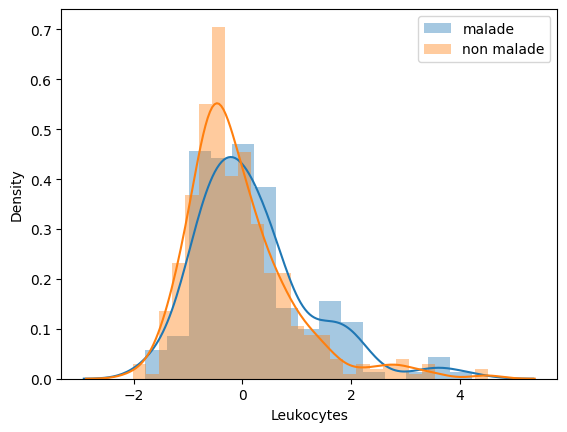

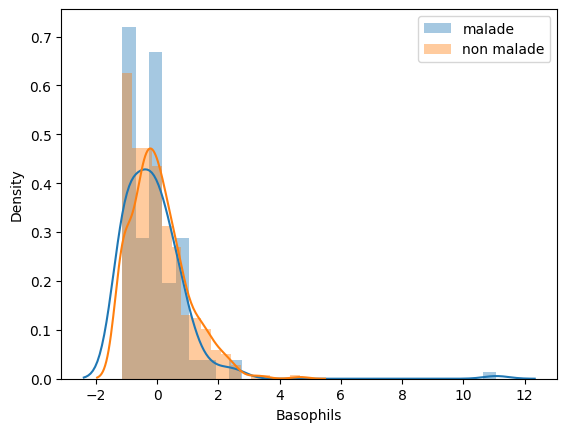

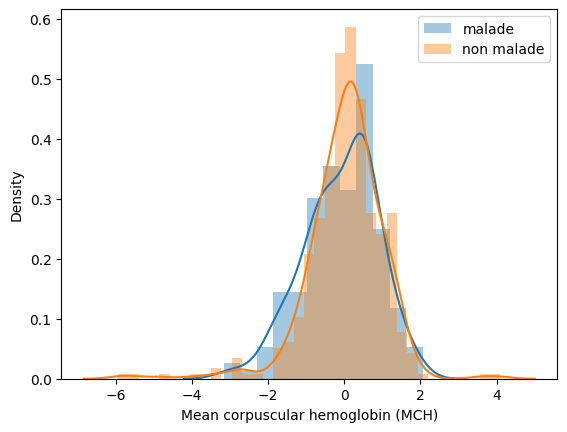

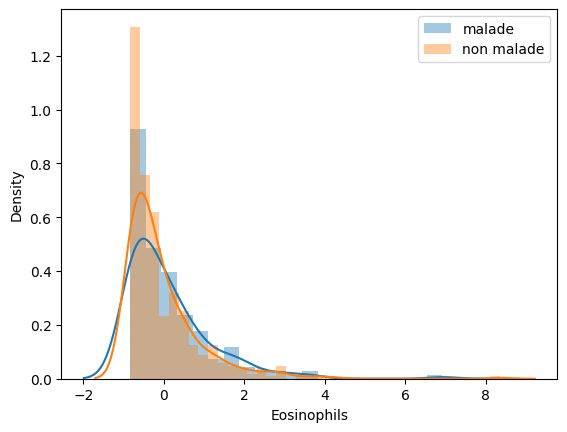

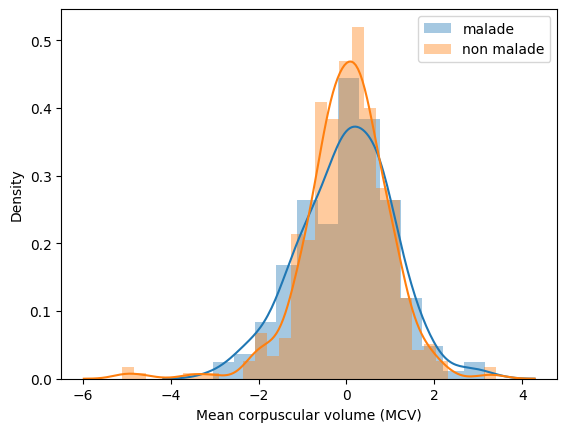

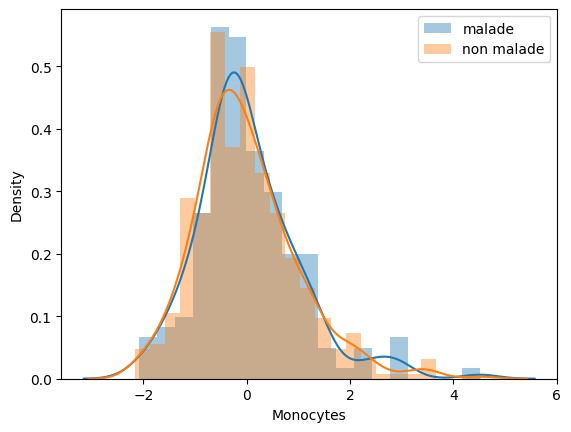

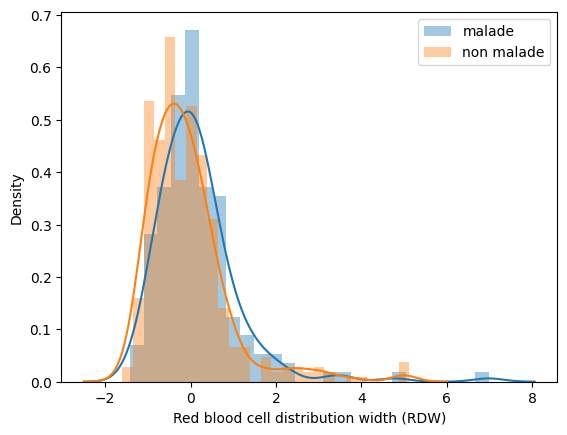

In [43]:
for col in Blood_columns:
  plt.figure()
  sns.distplot(malade_df[col],label="malade")
  sns.distplot(non_malade_df[col],label="non malade")
  plt.legend()


In [44]:
def hospitalisation(df):
  if df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
    return 'soins attensive'
  elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
      return 'soins semi attensive'
  elif df['Patient addmited to regular ward (1=yes, 0=no)']==1:
      return 'surveillance'
  else:
      return 'inconnu'



In [45]:
df['status']=df.apply(hospitalisation,axis=1)

In [46]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

<ipython-input-47-6e8c0baf75f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['status']==cat][col],label=cat)
<ipython-input-47-6e8c0baf75f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['status']==cat][col],label=cat)
<ipython-input-47-6e8c0baf75f3>:4: UserWarning: 

`distplo

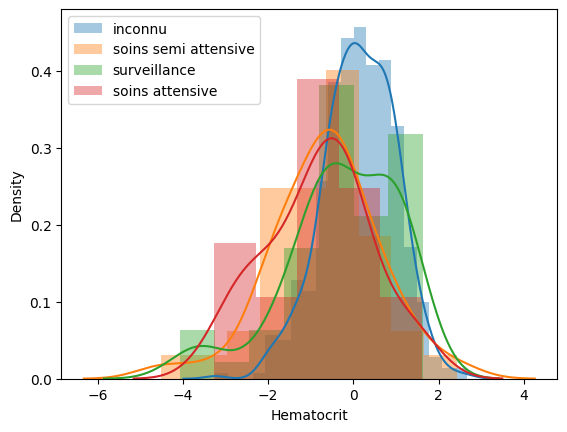

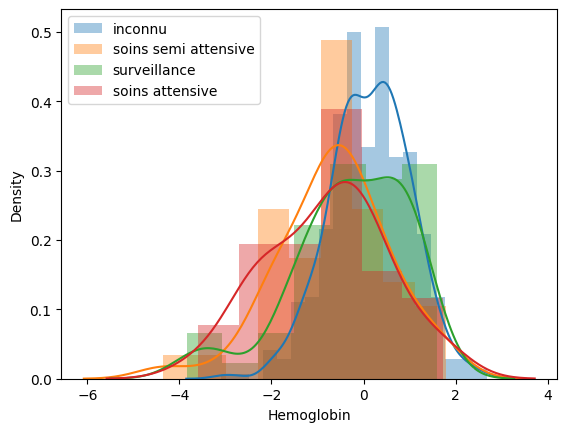

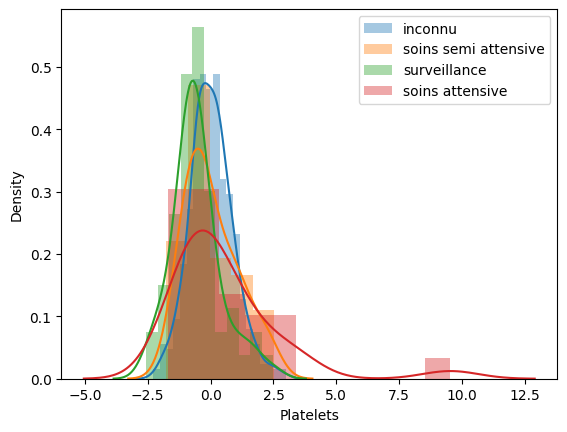

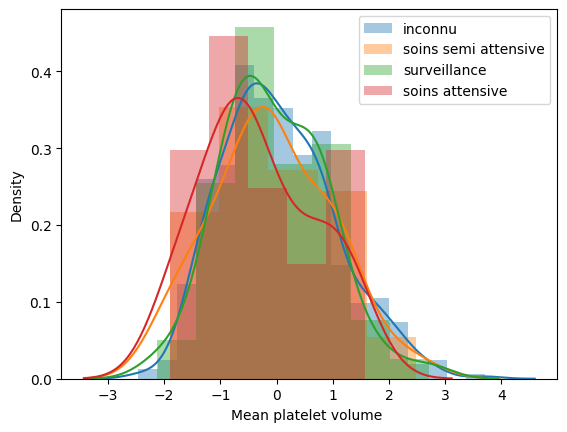

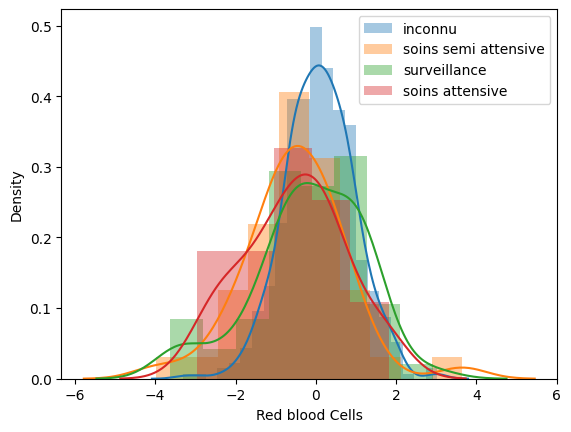

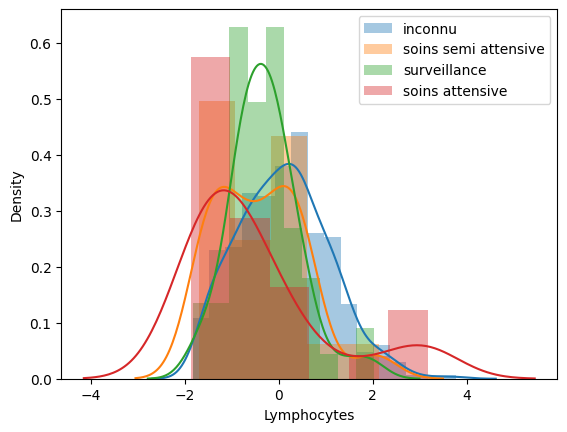

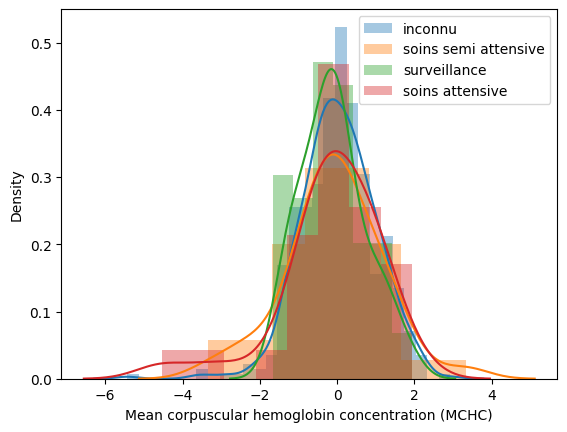

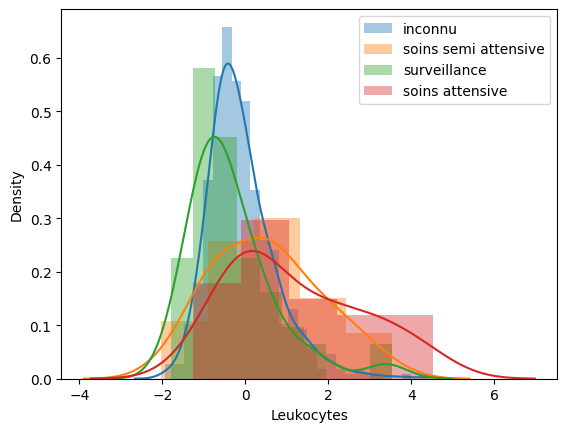

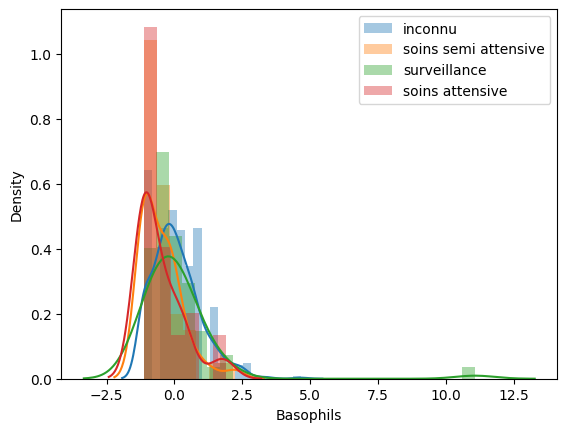

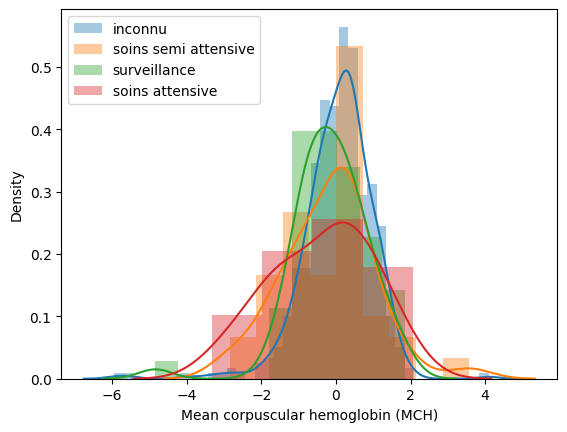

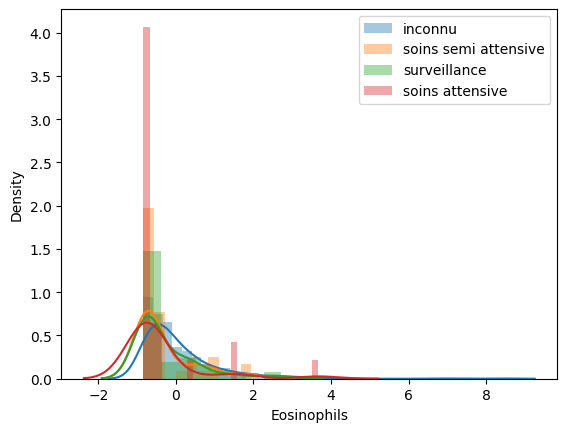

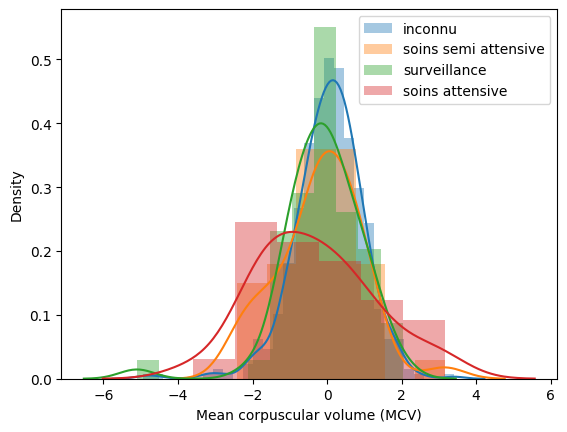

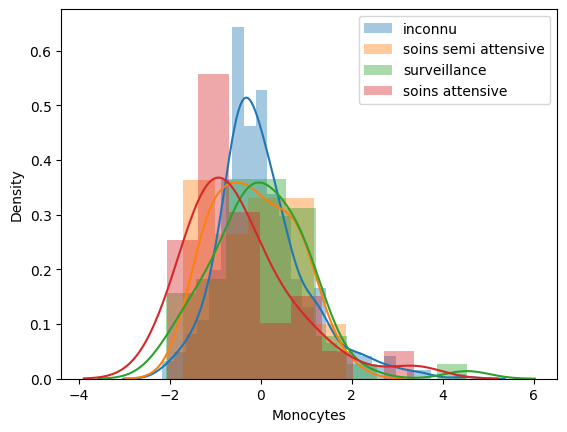

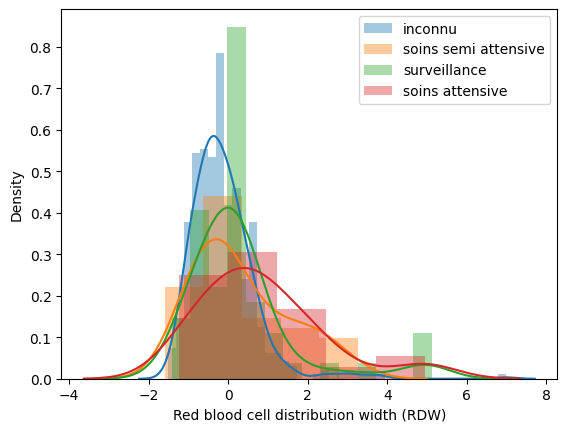

In [47]:
for col in Blood_columns:
  plt.figure()
  for cat in df['status'].unique():
    sns.distplot(df[df['status']==cat][col],label=cat)
  plt.legend()

# Analyse des NAN

In [48]:
df[Viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [49]:
df1=df[Viral_columns[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-49-586f6a1d0c38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid']=df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [50]:
df[Blood_columns].count()


Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [51]:
df2=df[Blood_columns[:-2]]
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

<ipython-input-51-0301ea5c9aae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid']=df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

# `hypotheses nulle (H0)`
* T-test

In [52]:
from scipy.stats import ttest_ind


In [53]:
positif_df.shape

(558, 38)

In [54]:
negatif_df.shape

(5086, 38)

In [55]:
balanced_neg=negatif_df.sample(positif_df.shape[0])

In [56]:
def t_test(col):
  alpha=0.02
  stat,p=ttest_ind(balanced_neg[col].dropna(),positif_df[col].dropna())
  if p<alpha:
    return 'H0 Rejetée'
  else:
    return 0

In [57]:
for col in Blood_columns:
  print(f'{col:-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------H0 Rejetée
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejetée
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejetée
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 Rejetée
Red blood cell distribution width (RDW)-----------0


# PRE-PROCESSING

In [58]:
df=data.copy()

# Création des sous ensembles(suite au EDA)


In [59]:
missing_rate=df.isna().sum()/df.shape[0]

In [60]:
Blood_columns=list(df.columns[(missing_rate<0.9)&(missing_rate>0.88)])
Viral_columns=list(df.columns[(missing_rate<0.80)&(missing_rate>0.75)])

In [61]:
key_columns=['Patient age quantile','SARS-Cov-2 exam result']

In [62]:
df=df[key_columns+Blood_columns+Viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

# TrainTest - Nettoyage - Encodage

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [65]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [66]:
testset['SARS-Cov-2 exam result'].value_counts()


negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

# Nettoyage(Encodage)

In [67]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}

    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)

    return df

In [68]:
df.dtypes.value_counts()

object     18
float64    14
int64       1
dtype: int64

In [69]:
def feature_engennering(df):
  df['est malade']=df[Viral_columns].sum(axis=1)>=1
  df=df.drop(Viral_columns,axis=1)
  return df

In [70]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df


In [71]:
def preprocessing(df):
  df=encodage(df)
  df=feature_engennering(df)
  df=imputation(df)
  x=df.drop('SARS-Cov-2 exam result',axis=1)
  y=df['SARS-Cov-2 exam result']
  print(y.value_counts())
  return x,y

In [72]:
x_train,y_train=preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:

In [73]:
x_test,y_test=preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
<ipython-input-67-95ff5543bd1a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:

#

# Metrique d'evaluation

In [76]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [77]:
def evaluation(model_):
    model_.fit(x_train,y_train)
    y_pred=model_.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    N,train_score,val_score=learning_curve(model,x_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label="train score")
    plt.plot(N,val_score.mean(axis=1),label="validation score")
    plt.legend()

# Modellisation

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [79]:
preprocessor=make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

In [80]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC())
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [81]:
dict_of_models= {'RandomForest':RandomForest,
                 'AdaBoost':AdaBoost,
                 'SVM':SVM,
                 'KNN':KNN}

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

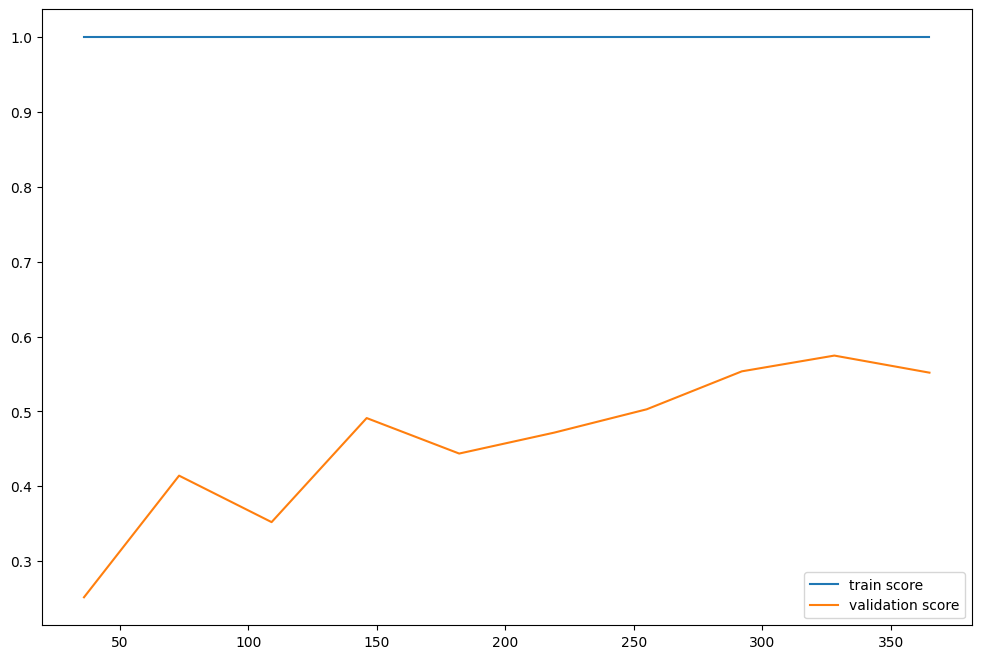

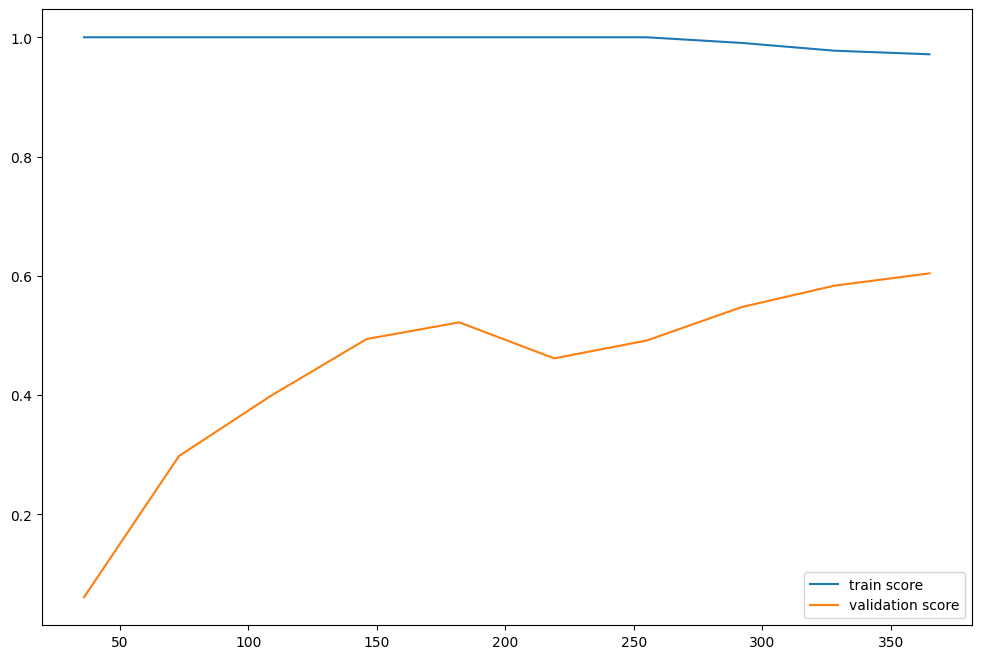

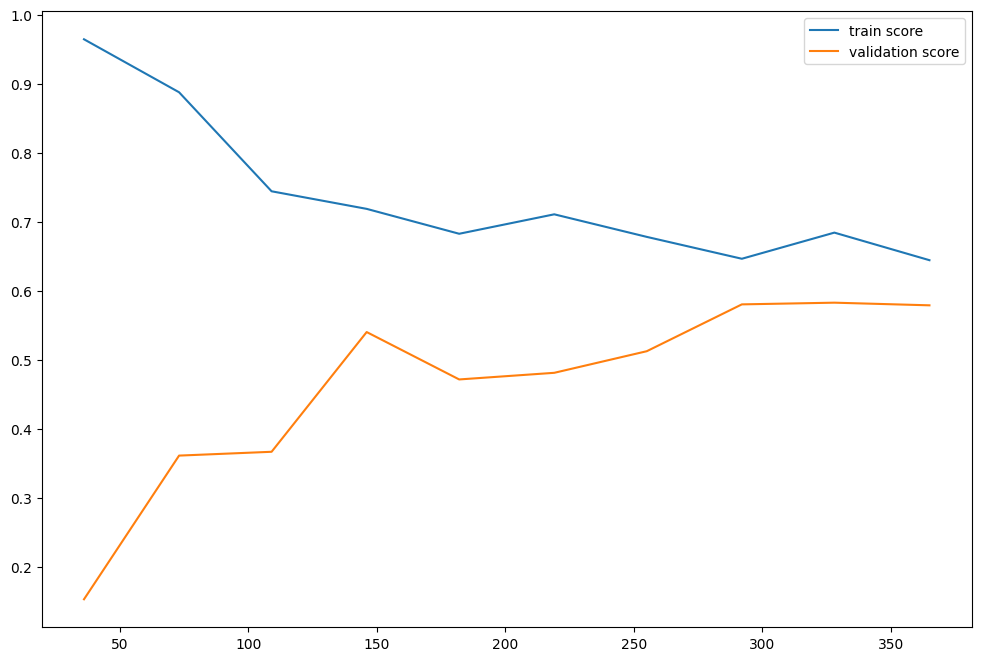

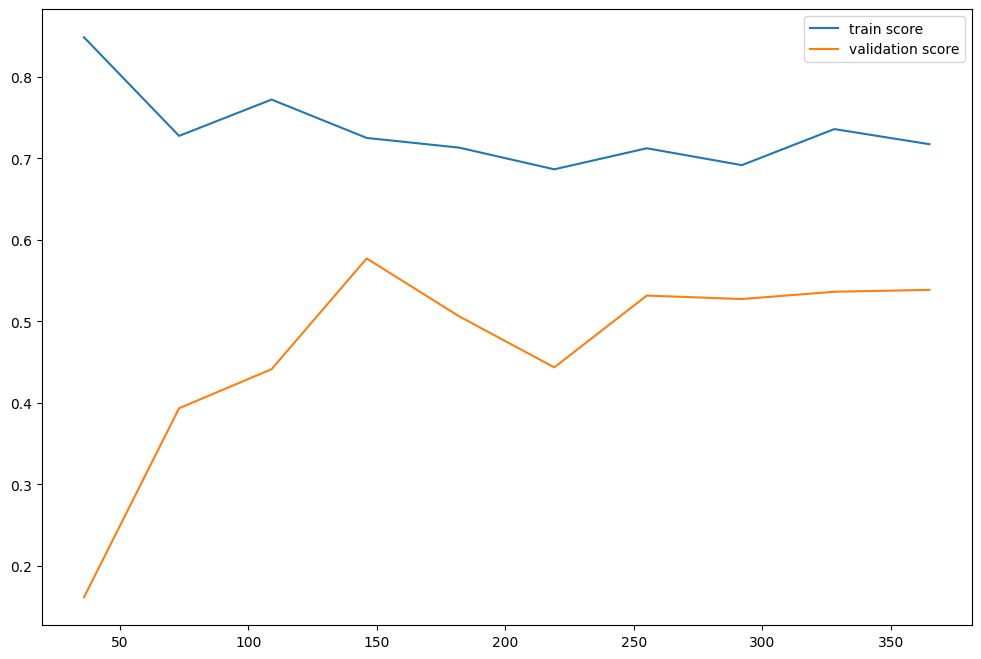

In [82]:
for name,model in dict_of_models.items():
  print(name)
  evaluation(model)

# Optimisation

In [83]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [84]:
hyper_param = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000],
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60) }

In [85]:
grid=RandomizedSearchCV(SVM,hyper_param,scoring='recall',cv=4,n_iter=80)
grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(x_test)
print(classification_report(y_test,y_pred))

{'svc__gamma': 0.0005, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.62      0.50      0.55        16

    accuracy                           0.88       111
   macro avg       0.77      0.72      0.74       111
weighted avg       0.87      0.88      0.88       111



[[90  5]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.62      0.50      0.55        16

    accuracy                           0.88       111
   macro avg       0.77      0.72      0.74       111
weighted avg       0.87      0.88      0.88       111



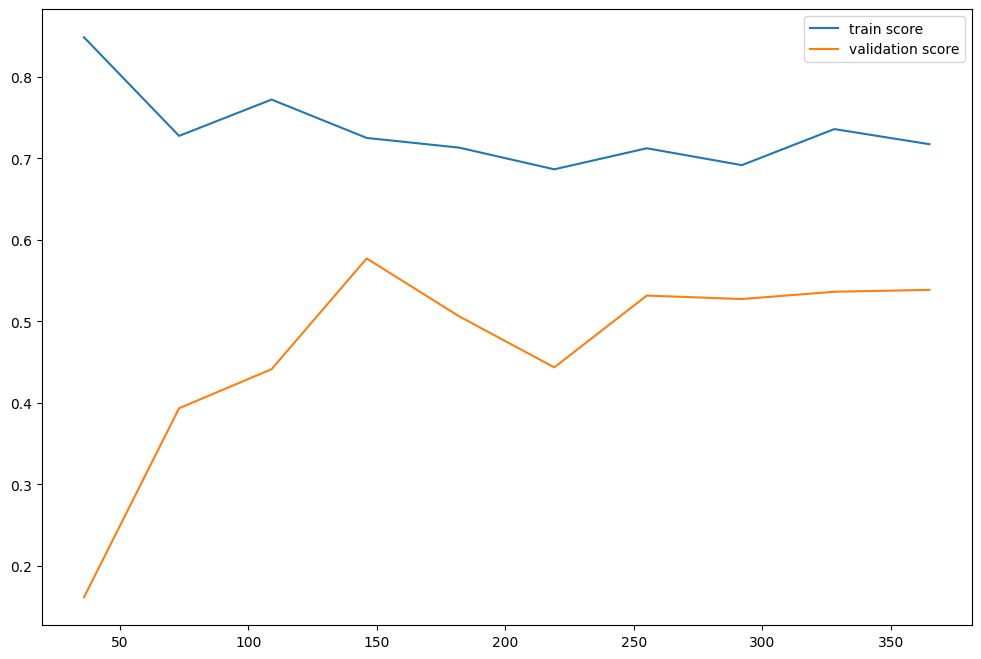

In [86]:
evaluation(grid.best_estimator_)

# Precission recall Curve

In [87]:
from sklearn.metrics import precision_recall_curve

In [88]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(x_test))

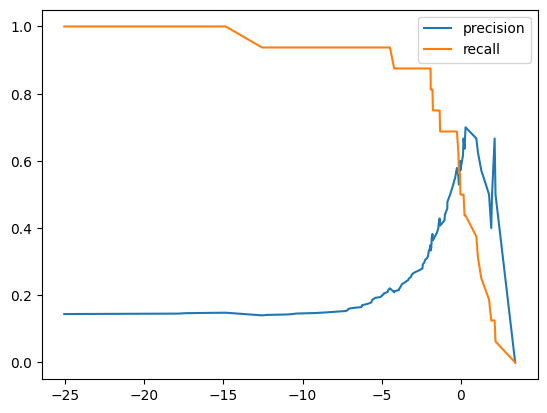

In [89]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()


In [90]:
def model_final(model,x,threshold=0):
  return model.decision_function(x)>threshold

In [92]:
y_pred=model_final(grid.best_estimator_,x_test,threshold=-1)

In [93]:
f1_score(y_test,y_pred)

0.5365853658536586

In [94]:
from sklearn.metrics import recall_score

In [95]:
recall_score(y_test,y_pred)

0.6875